In [168]:
#librería
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [169]:
data = pd.read_csv('listings.csv', encoding='latin-1')

In [170]:
pd.set_option('display.max_columns', None)
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,21853,https://www.airbnb.com/rooms/21853,20250914152907,2025-09-15,previous scrape,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,https://www.airbnb.com/users/show/83531,Abdel,2010-02-21,"Madrid, Spain",EN-ES-FR\r\nEN\r\nHi everybody: I'm Abdel. I'm...,within a day,100%,NaN,f,https://a0.muscache.com/im/users/83531/profile...,https://a0.muscache.com/im/users/83531/profile...,Aluche,2.0,2.0,"['email', 'phone']",t,t,"Madrid, Spain",CÃ¡rmenes,Latina,40.40381,-3.74130,Private room in rental unit,Private room,1,NaN,1 bath,NaN,NaN,"[""First aid kit"", ""Hair dryer"", ""Bed linens"", ...",NaN,4,40,4.0,4.0,40.0,40.0,4.0,40.0,NaN,t,0,0,0,198,2025-09-15,33,0,0,0,0,0,NaN,2014-10-10,2018-07-15,4.58,4.72,4.56,4.75,4.82,4.21,4.67,NaN,f,2,0,2,0,0.25
1,30320,https://www.airbnb.com/rooms/30320,20250914152907,2025-09-15,city scrape,Apartamentos Dana Sol,NaN,NaN,https://a0.muscache.com/pictures/336868/f67409...,130907,https://www.airbnb.com/users/show/130907,Danuta Weronika,2010-05-24,"Madrid, Spain",Apartasol offers a network of several spacious...,within an hour,100%,100%,f,https://a0.muscache.com/im/users/130907/profil...,https://a0.muscache.com/im/users/130907/profil...,Sol,17.0,18.0,"['email', 'phone']",t,t,NaN,Sol,Centro,40.41476,-3.70418,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,"[""TV with standard cable"", ""Elevator"", ""Air co...",$157.00,5,50,1.0,7.0,50.0,50.0,5.0,50.0,NaN,t,16,46,76,342,2025-09-15,173,1,1,88,0,10,1570.0,2010-07-06,2025-08-27,4.63,4.71,4.88,4.82,4.78,4.90,4.69,NaN,t,17,17,0,0,0.93
2,30959,https://www.airbnb.com/rooms/30959,20250914152907,2025-09-15,previous scrape,Beautiful loft in Madrid Center,Beautiful Loft 60m2 size just in the historica...,NaN,https://a0.muscache.com/pictures/78173471/835e...,132883,https://www.airbnb.com/users/show/132883,Angela,2010-05-26,"Madrid, Spain",Estoy empezando en Airbnb y deseo que mis huÃ©...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/132883/profil...,https://a0.muscache.com/im/users/132883/profil...,Embajadores,1.0,4.0,"['email', 'phone']",t,f,NaN,Embajadores,Centro,40.41259,-3.70105,Entire loft,Entire home/apt,2,NaN,1 bath,1.0,NaN,"[""TV with standard cable"", ""Elevator"", ""Pets a...",NaN,3,730,3.0,3.0,730.0,730.0,3.0,730.0,NaN,NaN,0,0,0,0,2025-09-15,8,0,0,0,0,0,NaN,2015-05-12,2017-05-30,4.38,4.14,4.38,4.63,4.63,4.88,4.25,NaN,f,1,1,0,0,0.06
3,40916,https://www.airbnb.com/rooms/40916,20250914152907,2025-09-15,city scrape,Apartasol Apartamentos Dana

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            25000 non-null  int64  
 1   listing_url                                   25000 non-null  object 
 2   scrape_id                                     25000 non-null  int64  
 3   last_scraped                                  25000 non-null  object 
 4   source                                        25000 non-null  object 
 5   name                                          25000 non-null  object 
 6   description                                   24130 non-null  object 
 7   neighborhood_overview                         10586 non-null  object 
 8   picture_url                                   24999 non-null  object 
 9   host_id                                       25000 non-null 

In [172]:
import re

def extract_bathroom_count(text):
    if pd.isna(text):
        return np.nan
    text = str(text).lower()

    # Handle specific half-bath cases first, as they are distinct
    if 'private half-bath' in text or 'shared half-bath' in text or 'half-bath' in text:
        return 0.5

    # Handle explicit zero baths
    if '0 baths' in text or '0 shared baths' in text:
        return 0.0

    # Use a more robust regex to capture numbers, optionally followed by 'shared'/'private' and 'bath'/'baths'
    match = re.search(r'(\d+\.?\d*)\s*(?:shared|private)?\s*baths?', text)
    if match:
        return float(match.group(1))

    return np.nan

data['bathrooms'] = data['bathrooms_text'].apply(extract_bathroom_count)
print(data['bathrooms'].value_counts(dropna=False).head(20))

bathrooms
1.0     17843
2.0      4215
1.5      1116
3.0       694
0.5       287
2.5       252
0.0       188
4.0       161
3.5        70
5.0        46
6.0        34
4.5        32
NaN        28
8.0        13
7.0         8
5.5         7
6.5         2
15.0        1
14.0        1
19.0        1
Name: count, dtype: int64


In [173]:
nan_bathroom_text = data[data['bathrooms'].isna()]['bathrooms_text'].value_counts(dropna=False)
print(nan_bathroom_text.head(50))

bathrooms_text
NaN    28
Name: count, dtype: int64


In [174]:
data['bathrooms'].describe()

,bathrooms
count,24972.000000
mean,1.302919
std,0.679462
min,0.000000
25%,1.000000
50%,1.000000
75%,1.500000
max,19.000000


In [175]:
pd.set_option('display.max_columns', None)
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,21853,https://www.airbnb.com/rooms/21853,20250914152907,2025-09-15,previous scrape,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,https://www.airbnb.com/users/show/83531,Abdel,2010-02-21,"Madrid, Spain",EN-ES-FR\r\nEN\r\nHi everybody: I'm Abdel. I'm...,within a day,100%,NaN,f,https://a0.muscache.com/im/users/83531/profile...,https://a0.muscache.com/im/users/83531/profile...,Aluche,2.0,2.0,"['email', 'phone']",t,t,"Madrid, Spain",CÃ¡rmenes,Latina,40.40381,-3.74130,Private room in rental unit,Private room,1,1.0,1 bath,NaN,NaN,"[""First aid kit"", ""Hair dryer"", ""Bed linens"", ...",NaN,4,40,4.0,4.0,40.0,40.0,4.0,40.0,NaN,t,0,0,0,198,2025-09-15,33,0,0,0,0,0,NaN,2014-10-10,2018-07-15,4.58,4.72,4.56,4.75,4.82,4.21,4.67,NaN,f,2,0,2,0,0.25
1,30320,https://www.airbnb.com/rooms/30320,20250914152907,2025-09-15,city scrape,Apartamentos Dana Sol,NaN,NaN,https://a0.muscache.com/pictures/336868/f67409...,130907,https://www.airbnb.com/users/show/130907,Danuta Weronika,2010-05-24,"Madrid, Spain",Apartasol offers a network of several spacious...,within an hour,100%,100%,f,https://a0.muscache.com/im/users/130907/profil...,https://a0.muscache.com/im/users/130907/profil...,Sol,17.0,18.0,"['email', 'phone']",t,t,NaN,Sol,Centro,40.41476,-3.70418,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,"[""TV with standard cable"", ""Elevator"", ""Air co...",$157.00,5,50,1.0,7.0,50.0,50.0,5.0,50.0,NaN,t,16,46,76,342,2025-09-15,173,1,1,88,0,10,1570.0,2010-07-06,2025-08-27,4.63,4.71,4.88,4.82,4.78,4.90,4.69,NaN,t,17,17,0,0,0.93
2,30959,https://www.airbnb.com/rooms/30959,20250914152907,2025-09-15,previous scrape,Beautiful loft in Madrid Center,Beautiful Loft 60m2 size just in the historica...,NaN,https://a0.muscache.com/pictures/78173471/835e...,132883,https://www.airbnb.com/users/show/132883,Angela,2010-05-26,"Madrid, Spain",Estoy empezando en Airbnb y deseo que mis huÃ©...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/132883/profil...,https://a0.muscache.com/im/users/132883/profil...,Embajadores,1.0,4.0,"['email', 'phone']",t,f,NaN,Embajadores,Centro,40.41259,-3.70105,Entire loft,Entire home/apt,2,1.0,1 bath,1.0,NaN,"[""TV with standard cable"", ""Elevator"", ""Pets a...",NaN,3,730,3.0,3.0,730.0,730.0,3.0,730.0,NaN,NaN,0,0,0,0,2025-09-15,8,0,0,0,0,0,NaN,2015-05-12,2017-05-30,4.38,4.14,4.38,4.63,4.63,4.88,4.25,NaN,f,1,1,0,0,0.06
3,40916,https://www.airbnb.com/rooms/40916,20250914152907,2025-09-15,city scrape,Apartasol Apartamentos Dana

In [176]:
data['price'].dtype

dtype('O')

In [177]:
data['price'] = data['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
data['price'] = pd.to_numeric(data['price'], errors='coerce')

In [178]:
data['price'].dtype

dtype('float64')

In [179]:
data['price'].describe()

,price
count,18953.000000
mean,156.691447
std,492.255350
min,8.000000
25%,70.000000
50%,110.000000
75%,164.000000
max,25654.000000


In [180]:
data.head(10)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,21853,https://www.airbnb.com/rooms/21853,20250914152907,2025-09-15,previous scrape,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,https://www.airbnb.com/users/show/83531,Abdel,2010-02-21,"Madrid, Spain",EN-ES-FR\r\nEN\r\nHi everybody: I'm Abdel. I'm...,within a day,100%,NaN,f,https://a0.muscache.com/im/users/83531/profile...,https://a0.muscache.com/im/users/83531/profile...,Aluche,2.0,2.0,"['email', 'phone']",t,t,"Madrid, Spain",CÃ¡rmenes,Latina,40.40381,-3.74130,Private room in rental unit,Private room,1,1.0,1 bath,NaN,NaN,"[""First aid kit"", ""Hair dryer"", ""Bed linens"", ...",NaN,4,40,4.0,4.0,40.0,40.0,4.0,40.0,NaN,t,0,0,0,198,2025-09-15,33,0,0,0,0,0,NaN,2014-10-10,2018-07-15,4.58,4.72,4.56,4.75,4.82,4.21,4.67,NaN,f,2,0,2,0,0.25
1,30320,https://www.airbnb.com/rooms/30320,20250914152907,2025-09-15,city scrape,Apartamentos Dana Sol,NaN,NaN,https://a0.muscache.com/pictures/336868/f67409...,130907,https://www.airbnb.com/users/show/130907,Danuta Weronika,2010-05-24,"Madrid, Spain",Apartasol offers a network of several spacious...,within an hour,100%,100%,f,https://a0.muscache.com/im/users/130907/profil...,https://a0.muscache.com/im/users/130907/profil...,Sol,17.0,18.0,"['email', 'phone']",t,t,NaN,Sol,Centro,40.41476,-3.70418,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,"[""TV with standard cable"", ""Elevator"", ""Air co...",157.0,5,50,1.0,7.0,50.0,50.0,5.0,50.0,NaN,t,16,46,76,342,2025-09-15,173,1,1,88,0,10,1570.0,2010-07-06,2025-08-27,4.63,4.71,4.88,4.82,4.78,4.90,4.69,NaN,t,17,17,0,0,0.93
2,30959,https://www.airbnb.com/rooms/30959,20250914152907,2025-09-15,previous scrape,Beautiful loft in Madrid Center,Beautiful Loft 60m2 size just in the historica...,NaN,https://a0.muscache.com/pictures/78173471/835e...,132883,https://www.airbnb.com/users/show/132883,Angela,2010-05-26,"Madrid, Spain",Estoy empezando en Airbnb y deseo que mis huÃ©...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/132883/profil...,https://a0.muscache.com/im/users/132883/profil...,Embajadores,1.0,4.0,"['email', 'phone']",t,f,NaN,Embajadores,Centro,40.41259,-3.70105,Entire loft,Entire home/apt,2,1.0,1 bath,1.0,NaN,"[""TV with standard cable"", ""Elevator"", ""Pets a...",NaN,3,730,3.0,3.0,730.0,730.0,3.0,730.0,NaN,NaN,0,0,0,0,2025-09-15,8,0,0,0,0,0,NaN,2015-05-12,2017-05-30,4.38,4.14,4.38,4.63,4.63,4.88,4.25,NaN,f,1,1,0,0,0.06
3,40916,https://www.airbnb.com/rooms/40916,20250914152907,2025-09-15,city scrape,Apartasol Apartamentos Dana,N

In [181]:
del data['picture_url']

In [182]:
del data['host_picture_url']

In [183]:
del data['host_has_profile_pic']

In [184]:
del data['bathrooms_text']

In [185]:
del data['host_thumbnail_url']

In [186]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            25000 non-null  int64  
 1   listing_url                                   25000 non-null  object 
 2   scrape_id                                     25000 non-null  int64  
 3   last_scraped                                  25000 non-null  object 
 4   source                                        25000 non-null  object 
 5   name                                          25000 non-null  object 
 6   description                                   24130 non-null  object 
 7   neighborhood_overview                         10586 non-null  object 
 8   host_id                                       25000 non-null  int64  
 9   host_url                                      25000 non-null 

In [187]:
data['price'].head()

,price
0,NaN
1,157.0
2,NaN
3,143.0
4,65.0


In [188]:
data.isnull().sum()

,0
id,0
listing_url,0
scrape_id,0
last_scraped,0
source,0
...,...
calculated_host_listings_count,0
calculated_host_listings_count_entire_homes,0
calculated_host_listings_count_private_rooms,0
calculated_host_listings_count_shared_rooms,0


In [189]:
data['reviews_per_month'].head()

,reviews_per_month
0,0.25
1,0.93
2,0.06
3,0.29
4,2.78


In [190]:
del data['calendar_updated']

In [191]:
data['price'].head()

,price
0,NaN
1,157.0
2,NaN
3,143.0
4,65.0


In [192]:
del data['host_is_superhost']

In [193]:
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,21853,https://www.airbnb.com/rooms/21853,20250914152907,2025-09-15,previous scrape,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,83531,https://www.airbnb.com/users/show/83531,Abdel,2010-02-21,"Madrid, Spain",EN-ES-FR\r\nEN\r\nHi everybody: I'm Abdel. I'm...,within a day,100%,NaN,Aluche,2.0,2.0,"['email', 'phone']",t,"Madrid, Spain",CÃ¡rmenes,Latina,40.40381,-3.74130,Private room in rental unit,Private room,1,1.0,NaN,NaN,"[""First aid kit"", ""Hair dryer"", ""Bed linens"", ...",NaN,4,40,4.0,4.0,40.0,40.0,4.0,40.0,t,0,0,0,198,2025-09-15,33,0,0,0,0,0,NaN,2014-10-10,2018-07-15,4.58,4.72,4.56,4.75,4.82,4.21,4.67,NaN,f,2,0,2,0,0.25
1,30320,https://www.airbnb.com/rooms/30320,20250914152907,2025-09-15,city scrape,Apartamentos Dana Sol,NaN,NaN,130907,https://www.airbnb.com/users/show/130907,Danuta Weronika,2010-05-24,"Madrid, Spain",Apartasol offers a network of several spacious...,within an hour,100%,100%,Sol,17.0,18.0,"['email', 'phone']",t,NaN,Sol,Centro,40.41476,-3.70418,Entire rental unit,Entire home/apt,2,1.0,1.0,2.0,"[""TV with standard cable"", ""Elevator"", ""Air co...",157.0,5,50,1.0,7.0,50.0,50.0,5.0,50.0,t,16,46,76,342,2025-09-15,173,1,1,88,0,10,1570.0,2010-07-06,2025-08-27,4.63,4.71,4.88,4.82,4.78,4.90,4.69,NaN,t,17,17,0,0,0.93
2,30959,https://www.airbnb.com/rooms/30959,20250914152907,2025-09-15,previous scrape,Beautiful loft in Madrid Center,Beautiful Loft 60m2 size just in the historica...,NaN,132883,https://www.airbnb.com/users/show/132883,Angela,2010-05-26,"Madrid, Spain",Estoy empezando en Airbnb y deseo que mis huÃ©...,NaN,NaN,NaN,Embajadores,1.0,4.0,"['email', 'phone']",f,NaN,Embajadores,Centro,40.41259,-3.70105,Entire loft,Entire home/apt,2,1.0,1.0,NaN,"[""TV with standard cable"", ""Elevator"", ""Pets a...",NaN,3,730,3.0,3.0,730.0,730.0,3.0,730.0,NaN,0,0,0,0,2025-09-15,8,0,0,0,0,0,NaN,2015-05-12,2017-05-30,4.38,4.14,4.38,4.63,4.63,4.88,4.25,NaN,f,1,1,0,0,0.06
3,40916,https://www.airbnb.com/rooms/40916,20250914152907,2025-09-15,city scrape,Apartasol Apartamentos Dana,NaN,NaN,130907,https://www.airbnb.com/users/show/130907,Danuta Weronika,2010-05-24,"Madrid, Spain",Apartasol offers a network of several spacious...,within an hour,100%,100%,Sol,17.0,18.0,"['email', 'phone']",t,NaN,Universidad,Centro,40.42247,-3.70577,Entire rental unit,Entire home/apt,2,1.0,1.0,3.0,"[""Elevator"", ""Wifi"", ""Air conditioning"", ""TV"",...",143.0,5,50,2.0,5.0,50.0,50.0,5.0,50.0,t,10,40,66,341,2025-09-15,53,4,1,84,0,40,5720.0,2010-11-01,2025-09-11,4.68,4.71,4.90,4.87,4.81,4.88,4.59,NaN,t,17,17,0,0,0.29
4,62423,https://www.airbnb.com/rooms/62423,20250914152907,2025-09-15,city scrape,MAGIC ART

In [194]:
del data['listing_url']

In [195]:
del data['scrape_id']

In [196]:
del data['last_scraped']

In [197]:
del data['source']

In [198]:
del data['name']

In [199]:
del data['description']

In [200]:
del data['neighborhood_overview']

In [201]:
del data['host_id']

In [202]:
del data['host_url']

In [203]:
del data['host_name']

In [204]:
del data['host_since']

In [205]:
del data['host_location']

In [206]:
del data['host_about']

In [207]:
del data['host_response_time']

In [208]:
del data['host_neighbourhood']

In [209]:
del data['host_listings_count']

In [210]:
del data['host_total_listings_count']

In [211]:
del data['host_verifications']

In [212]:
del data['host_identity_verified']

In [213]:
data.dropna(subset = ['price'], inplace = True)


In [214]:
del data['has_availability']

In [215]:
del data['availability_30']

In [216]:
del data['availability_60']

In [217]:
del data['availability_90']

In [218]:
del data['calendar_last_scraped']

In [219]:
del data['number_of_reviews_ltm']

In [220]:
del data['number_of_reviews_l30d']

In [221]:
del data['availability_eoy']

In [222]:
del data['number_of_reviews_ly']

In [223]:
del data['first_review']

In [224]:
del data['last_review']

In [225]:
del data['license']

In [226]:
del data['calculated_host_listings_count']

In [227]:
del data['calculated_host_listings_count_entire_homes']

In [228]:
del data['calculated_host_listings_count_private_rooms']

In [229]:
del data['calculated_host_listings_count_shared_rooms']

In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18953 entries, 1 to 24999
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            18953 non-null  int64  
 1   host_response_rate            17784 non-null  object 
 2   host_acceptance_rate          18241 non-null  object 
 3   neighbourhood                 8031 non-null   object 
 4   neighbourhood_cleansed        18953 non-null  object 
 5   neighbourhood_group_cleansed  18953 non-null  object 
 6   latitude                      18953 non-null  float64
 7   longitude                     18953 non-null  float64
 8   property_type                 18953 non-null  object 
 9   room_type                     18953 non-null  object 
 10  accommodates                  18953 non-null  int64  
 11  bathrooms                     18932 non-null  float64
 12  bedrooms                      18923 non-null  float64
 13  beds  

In [231]:
data['amenities'].value_counts()

,count
amenities,
"[""Wifi"", ""Air conditioning"", ""TV"", ""Kitchen"", ""Washer""]",102
"[""Air conditioning"", ""TV"", ""Dedicated workspace"", ""Kitchen"", ""Wifi"", ""Washer""]",79
"[""Smoke alarm"", ""Lock on bedroom door"", ""Air conditioning"", ""TV"", ""Dedicated workspace"", ""Kitchen"", ""Wifi"", ""Washer""]",59
"[""Iron"", ""Freezer"", ""TV with standard cable"", ""Smoke alarm"", ""Elevator"", ""Refrigerator"", ""Dishwasher"", ""Oven"", ""Air conditioning"", ""Microwave"", ""Bed linens"", ""Kitchen"", ""Heating"", ""Wifi"", ""Washer""]",59
"[""Washer \u2013\u00a0In unit"", ""Crib"", ""Hair dryer"", ""Private entrance"", ""Bed linens"", ""Cooking basics"", ""Shampoo"", ""Wifi"", ""Microwave"", ""Long term stays allowed"", ""Hot water"", ""Hangers"", ""High chair"", ""Pets allowed"", ""Air conditioning"", ""Kitchen"", ""Essentials"", ""TV"", ""Refrigerator"", ""Heating"", ""Iron"", ""Lockbox"", ""Elevator"", ""Self check-in"", ""Dishwasher"", ""Oven""]",58
...,...
"[""Hair dryer"", ""Bed linens"", ""Cooking basics"", ""Dishes and silverware"", ""Wifi"", ""Hot water"", ""Hangers"", ""Coffee maker"", ""Air conditioning"", ""Kitchen"", ""Essentials"", ""TV"", ""Dedicated workspace"", ""Toaster"", ""Hot water kettle"", ""Refrigerator"", ""Free dryer \u2013 In building"", ""Wine glasses"", ""Iron"", ""Elevator"", ""Free washer \u2013 In building"", ""Central heating""]",1
"[""Electric stove"", ""Cleaning products"", ""Central air conditioning"", ""Hair dryer"", ""Bed linens"", ""Portable fans"", ""Cooking basics"", ""Wifi"", ""Dishes and silverware"", ""Microwave"", ""Freezer"", ""Long term stays allowed"", ""Hot water"", ""Hangers"", ""HDTV"", ""Single level home"", ""Bathtub"", ""Dining table"", ""Kitchen"", ""Free washer \u2013 In unit"", ""Drying rack for clothing"", ""Coffee maker: Nespresso"", ""Paid parking garage off premises"", ""Essentials"", ""Dedicated workspace"", ""Toaster"", ""Hot water kettle"", ""Refrigerator"", ""Heating"", ""Host greets you"", ""Room-darkening shades"", ""Iron"", ""Elevator"", ""Dishwasher"", ""Oven"", ""Clothing storage: closet"", ""Books and reading material""]",1
"[""Electric stove"", ""Cleaning products"", ""Hair dryer"", ""Bed linens"", ""Cooking basics"", ""Shampoo"", ""Wifi"", ""Dishes and silverware"", ""Microwave"", ""Freezer"", ""Hot water"", ""Hangers"", ""HDTV"", ""Single level home"", ""Air conditioning"", ""Dining table"", ""Coffee maker: drip coffee maker"", ""Kitchen"", ""Free washer \u2013 In unit"", ""Drying rack for clothing"", ""Shower gel"", ""Essentials"", ""Toaster"", ""Hot water kettle"", ""Refrigerator"", ""Heating"", ""Baking sheet"", ""Wine glasses"", ""Room-darkening shades"", ""Iron"", ""Clothing storage"", ""Elevator"", ""Oven""]",1


# Task
```python
# Initialize new binary columns for amenities
amenity_categories = [
    'Wifi', 'Air_conditioning', 'Kitchen_and_dining', 'Washer_dryer', 'TV',
    'Safe', 'Refrigerator', 'Smoke_alarm_home_safety', 'Essentials', 'Services'
]
for col in amenity_categories:
    data[col] = 0

# Define keywords for each amenity category (all lowercase)
amenity_keywords = {
    'Wifi': ['wifi', 'wireless internet'],
    'Air_conditioning': ['air conditioning', 'central air conditioning', 'portable air conditioning'],
    'Kitchen_and_dining': ['kitchen', 'cooking basics', 'dishes and silverware', 'microwave', 'refrigerator', 'oven', 'stove', 'freezer', 'coffee maker', 'toaster', 'dining table', 'hot water kettle'],
    'Washer_dryer': ['washer', 'dryer', 'washing machine'],
    'TV': ['tv', 'hdtv', 'standard cable tv'],
    'Safe': ['safe'],
    'Refrigerator': ['refrigerator'], # Refrigerator is also in Kitchen_and_dining, but keeping it separate as per instructions
    'Smoke_alarm_home_safety': ['smoke alarm', 'carbon monoxide alarm', 'fire extinguisher', 'first aid kit', 'security camera', 'lock on bedroom door'],
    'Essentials': ['essentials', 'bed linens', 'shampoo', 'body soap', 'toilet paper', 'towels', 'hair dryer', 'hangers', 'iron'],
    'Services': ['long term stays allowed', 'self check-in', 'lockbox', 'luggage dropoff']
}

# Extract and populate amenities
for index, row in data.iterrows():
    # Convert amenities string to lowercase for case-insensitive matching
    amenities_text = str(row['amenities']).lower()

    for category, keywords in amenity_keywords.items():
        for keyword in keywords:
            if keyword in amenities_text:
                data.loc[index, category] = 1
                break # Move to the next category once a keyword is found for the current one

# Drop the original 'amenities' column
data.drop('amenities', axis=1, inplace=True)

# Display the first few rows of the DataFrame with new amenity columns
print("DataFrame head with new amenity columns:")
print(data.head())

# Print DataFrame info to confirm updated structure
print("\nDataFrame info after amenity extraction:")
data.info()
```

## Prepare Amenity Columns

### Subtask:
Initialize new binary columns for each of the specified amenities: 'Wifi', 'Air_conditioning', 'Kitchen_and_dining', 'Washer_dryer', 'TV', 'Safe', 'Refrigerator', 'Smoke_alarm_home_safety', 'Essentials', and 'Services'. Each new column will be initialized with zeros.


**Reasoning**:
I need to initialize new binary columns in the `data` DataFrame for specific amenities as requested in the instructions. This involves creating a list of amenity names and then iterating through it to add each column with an initial value of 0.



In [232]:
amenity_categories = ['Wifi', 'Air_conditioning', 'Kitchen_and_dining', 'Washer_dryer', 'TV', 'Safe', 'Refrigerator', 'Smoke_alarm_home_safety', 'Essentials', 'Services']

for amenity in amenity_categories:
    data[amenity] = 0

print("New amenity columns initialized with zeros.")
print(data[amenity_categories].head())

New amenity columns initialized with zeros.
   Wifi  Air_conditioning  Kitchen_and_dining  Washer_dryer  TV  Safe  \
1     0                 0                   0             0   0     0   
3     0                 0                   0             0   0     0   
4     0                 0                   0             0   0     0   
6     0                 0                   0             0   0     0   
7     0                 0                   0             0   0     0   

   Refrigerator  Smoke_alarm_home_safety  Essentials  Services  
1             0                        0           0         0  
3             0                        0           0         0  
4             0                        0           0         0  
6             0                        0           0         0  
7             0                        0           0         0  


**Reasoning**:
Now that the amenity columns are initialized, I need to iterate through the 'amenities' column, convert its contents to lowercase, and check for the presence of defined keywords to populate the new binary amenity columns. After populating, the original 'amenities' column will be dropped.



In [233]:
amenity_keywords = {
    'Wifi': ['wifi', 'wireless internet'],
    'Air_conditioning': ['air conditioning', 'central air conditioning', 'portable air conditioning'],
    'Kitchen_and_dining': ['kitchen', 'cooking basics', 'dishes and silverware', 'microwave', 'refrigerator', 'oven', 'stove', 'freezer', 'coffee maker', 'toaster', 'dining table', 'hot water kettle'],
    'Washer_dryer': ['washer', 'dryer', 'washing machine'],
    'TV': ['tv', 'hdtv', 'standard cable tv'],
    'Safe': ['safe'],
    'Refrigerator': ['refrigerator'],
    'Smoke_alarm_home_safety': ['smoke alarm', 'carbon monoxide alarm', 'fire extinguisher', 'first aid kit', 'security camera', 'lock on bedroom door'],
    'Essentials': ['essentials', 'bed linens', 'shampoo', 'body soap', 'toilet paper', 'towels', 'hair dryer', 'hangers', 'iron'],
    'Services': ['long term stays allowed', 'self check-in', 'lockbox', 'luggage dropoff']
}

for index, row in data.iterrows():
    amenities_text = str(row['amenities']).lower()

    for category, keywords in amenity_keywords.items():
        for keyword in keywords:
            if keyword in amenities_text:
                data.loc[index, category] = 1
                break

data.drop('amenities', axis=1, inplace=True)

print("DataFrame head with new amenity columns:")
print(data.head())

print("\nDataFrame info after amenity extraction:")
data.info()

DataFrame head with new amenity columns:
      id host_response_rate host_acceptance_rate  neighbourhood  \
1  30320               100%                 100%            NaN   
3  40916               100%                 100%            NaN   
4  62423               100%                  99%  Madrid, Spain   
6  70073               100%                 100%  Madrid, Spain   
7  70310               100%                 100%  Madrid, Spain   

  neighbourhood_cleansed neighbourhood_group_cleansed  latitude  longitude  \
1                    Sol                       Centro  40.41476   -3.70418   
3            Universidad                       Centro  40.42247   -3.70577   
4               Justicia                       Centro  40.41884   -3.69655   
6            Universidad                       Centro  40.42252   -3.70250   
7            Universidad                       Centro  40.42252   -3.70250   

                 property_type        room_type  accommodates  bathrooms  \
1          

## Summary:

### Data Analysis Key Findings
*   Ten new binary columns corresponding to specific amenity categories (`Wifi`, `Air_conditioning`, `Kitchen_and_dining`, `Washer_dryer`, `TV`, `Safe`, `Refrigerator`, `Smoke_alarm_home_safety`, `Essentials`, `Services`) were successfully initialized with zeros in the DataFrame.
*   The newly created amenity columns were populated with `0`s or `1`s by scanning the original `amenities` column for predefined keywords, indicating the presence or absence of each amenity.
*   The original `amenities` column was successfully removed from the DataFrame, resulting in an updated DataFrame structure with 46 columns in total, including the 10 new `int64` amenity columns.

### Insights or Next Steps
*   The creation of binary amenity columns facilitates quantitative analysis and machine learning tasks, allowing for easier feature engineering and modeling based on property amenities.
*   Further analysis could involve exploring the most common amenities, their correlation with property prices, or their impact on booking rates.


In [234]:
data.head(10)

,id,host_response_rate,host_acceptance_rate,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,Wifi,Air_conditioning,Kitchen_and_dining,Washer_dryer,TV,Safe,Refrigerator,Smoke_alarm_home_safety,Essentials,Services
1,30320,100%,100%,NaN,Sol,Centro,40.41476,-3.70418,Entire rental unit,Entire home/apt,2,1.0,1.0,2.0,157.0,5,50,1.0,7.0,50.0,50.0,5.0,50.0,342,173,10,1570.0,4.63,4.71,4.88,4.82,4.78,4.90,4.69,t,0.93,1,1,1,0,1,0,0,0,0,0
3,40916,100%,100%,NaN,Universidad,Centro,40.42247,-3.70577,Entire rental unit,Entire home/apt,2,1.0,1.0,3.0,143.0,5,50,2.0,5.0,50.0,50.0,5.0,50.0,341,53,40,5720.0,4.68,4.71,4.90,4.87,4.81,4.88,4.59,t,0.29,1,1,1,0,1,0,0,0,0,0
4,62423,100%,99%,"Madrid, Spain",Justicia,Centro,40.41884,-3.69655,Private room in rental unit,Private room,4,1.5,1.0,2.0,65.0,1,30,1.0,1.0,30.0,30.0,1.0,30.0,299,249,246,15990.0,4.65,4.78,4.46,4.80,4.86,4.97,4.60,f,2.78,1,0,1,1,0,0,1,1,1,0
6,70073,100%,100%,"Madrid, Spain",Universidad,Centro,40.42252,-3.70250,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,116.0,30,360,30.0,30.0,1125.0,1125.0,30.0,1125.0,305,36,60,6960.0,4.23,4.49,4.42,4.43,4.40,4.60,4.09,f,0.21,1,1,1,1,1,0,1,0,1,1
7,70310,100%,100%,"Madrid, Spain",Universidad,Centro,40.42252,-3.70250,Entire rental unit,Entire home/apt,2,1.0,1.0,2.0,79.0,30,360,1.0,31.0,1125.0,1125.0,28.6,1125.0,317,31,120,9480.0,4.37,4.65,4.55,4.80,4.71,4.87,4.10,f,0.18,1,1,1,1,1,0,1,0,1,1
8,72150,100%,95%,NaN,Embajadores,Centro,40.41150,-3.70449,Entire rental unit,Entire home/apt,6,1.0,3.0,5.0,300.0,3,180,2.0,3.0,180.0,180.0,2.3,180.0,180,133,90,27000.0,4.63,4.64,4.43,4.87,4.85,4.84,4.48,f,0.75,1,1,1,1,0,0,1,1,1,1
11,86042,100%,95%,NaN,Embajadores,Centro,40.40939,-3.69812,Entire rental unit,Entire home/apt,6,1.0,3.0,3.0,166.0,3,365,2.0,3.0,365.0,365.0,2.3,365.0,150,233,126,20916.0,4.83,4.81,4.65,4.88,4.92,4.92,4.68,f,1.34,1,1,1,1,1,0,1,1,1,1
14,120293,100%,94%,"Madrid, Comunidad de Madrid, Spain",Palacio,Centro,40.41143,-3.70912,Private room in rental unit,Private room,2,1.0,1.0,2.0,45.0,1,365,1.0,1.0,365.0,365.0,1.0,365.0,116,402,198,8910.0,4.80,4.85,4.82,4.90,4.90,4.95,4.74,f,2.35,1,0,1,1,1,0,1,1,1,1
15,136058,NaN,100%,"Madrid, Spain",Los Angeles,Villaverde,40.35761,-3.69723,Private room in rental unit,Private room,1,1.0,1.0,1.0,24.0,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,0,97,0,0.0,4.94,4.96,4.95,4.98,4.98,4.74,4.93,f,0.56,1,1,1,1,0,0,1,1,1,1
17,167183,100%,68%,"Madrid, Spain",Piovera,Hortaleza,40.45575,-3.64912,Private room in chalet,Private room,2,1.0,1.0,2.0,90.0,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,336,52,54,4860.0,4.82,4.80,4.94,4.90,4.82,4.84,4.80,f,0.32,1,1,1,0,1,0,0,1,1,1


In [235]:
del data['neighbourhood']

In [236]:
del data['neighbourhood_group_cleansed']

In [237]:
data['property_type'].value_counts()

,count
property_type,
Entire rental unit,12292
Private room in rental unit,3688
Private room in home,488
Entire loft,359
Entire condo,354
Entire serviced apartment,258
Entire home,221
Room in hotel,220
Private room in hostel,179


# Task
Analyze the unique values and their frequencies in the `property_type` column of the `data` DataFrame, then define simplified categories ('Entire_Place', 'Private_Room', 'Shared_Room', 'Hotel_Room', 'Other'). Create a mapping function to assign each original `property_type` to one of these new categories, and generate new binary columns for each category. Finally, drop the original `property_type` column and display the first few rows of the updated DataFrame and its info (`data.info()`).

## Analyze Property Types

### Subtask:
Examine the unique values and their frequencies in the `property_type` column to understand the distribution and identify suitable categories for simplification.


**Reasoning**:
The subtask requires examining the unique values and their frequencies in the `property_type` column. The `value_counts()` method is the most direct way to achieve this, providing both the unique values and their counts.



In [238]:
data['property_type'].value_counts()

,count
property_type,
Entire rental unit,12292
Private room in rental unit,3688
Private room in home,488
Entire loft,359
Entire condo,354
Entire serviced apartment,258
Entire home,221
Room in hotel,220
Private room in hostel,179


**Reasoning**:
Based on the unique values and their frequencies observed in the `property_type` column, I will now define a mapping function to categorize these into simplified groups: 'Entire_Place', 'Private_Room', 'Shared_Room', 'Hotel_Room', and 'Other'. This function will then be applied to create new binary columns for each category, and the original `property_type` column will be dropped.



In [239]:
def categorize_property_type(property_type):
    property_type = str(property_type).lower()
    if 'entire' in property_type or 'house' in property_type or 'loft' in property_type or 'condo' in property_type or 'villa' in property_type or 'chalet' in property_type or 'cabin' in property_type or 'bungalow' in property_type or 'guest suite' in property_type or 'vacation home' in property_type or 'tiny home' in property_type or 'place' in property_type or 'guesthouse' in property_type:
        return 'Entire_Place'
    elif 'private room' in property_type:
        return 'Private_Room'
    elif 'shared room' in property_type:
        return 'Shared_Room'
    elif 'hotel' in property_type or 'aparthotel' in property_type or 'boutique hotel' in property_type:
        return 'Hotel_Room'
    else:
        return 'Other'

data['simplified_property_type'] = data['property_type'].apply(categorize_property_type)

# Create dummy variables for the new simplified categories
dummy_property_types = pd.get_dummies(data['simplified_property_type'], prefix='property')
data = pd.concat([data, dummy_property_types], axis=1)

# Drop the original 'property_type' and 'simplified_property_type' columns
data.drop(['property_type', 'simplified_property_type'], axis=1, inplace=True)

print("DataFrame head with new property type columns:")
print(data.head())

print("\nDataFrame info after property type simplification:")
data.info()

DataFrame head with new property type columns:
      id host_response_rate host_acceptance_rate neighbourhood_cleansed  \
1  30320               100%                 100%                    Sol   
3  40916               100%                 100%            Universidad   
4  62423               100%                  99%               Justicia   
6  70073               100%                 100%            Universidad   
7  70310               100%                 100%            Universidad   

   latitude  longitude        room_type  accommodates  bathrooms  bedrooms  \
1  40.41476   -3.70418  Entire home/apt             2        1.0       1.0   
3  40.42247   -3.70577  Entire home/apt             2        1.0       1.0   
4  40.41884   -3.69655     Private room             4        1.5       1.0   
6  40.42252   -3.70250  Entire home/apt             2        1.0       1.0   
7  40.42252   -3.70250  Entire home/apt             2        1.0       1.0   

   beds  price  minimum_nights  m

## Summary:

### Data Analysis Key Findings
*   The `property_type` column initially contained 60 unique values, ranging from highly frequent types like 'Entire rental unit' (12,292 occurrences) and 'Private room in rental unit' (3,688 occurrences) to very rare ones such as 'Hut' or 'Yurt' (1 occurrence each). This diversity necessitated simplification.
*   The original `property_type` column was successfully categorized into five broader, simplified types: 'Entire\_Place', 'Private\_Room', 'Shared\_Room', 'Hotel\_Room', and 'Other'.
*   Five new binary (dummy) columns, representing these simplified categories (e.g., `property_Entire_Place`, `property_Private_Room`), were created and added to the DataFrame.
*   The original `property_type` column and the intermediate `simplified_property_type` column were removed, resulting in a DataFrame with 48 columns.

### Insights or Next Steps
*   The simplification of `property_type` into fewer, more manageable categories will likely improve the performance and interpretability of machine learning models by reducing high cardinality and potential sparsity issues.
*   The newly created binary features can now be directly used in predictive modeling or for further analysis to understand the impact of different property types on target variables, such as pricing or booking rates.


In [240]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18953 entries, 1 to 24999
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           18953 non-null  int64  
 1   host_response_rate           17784 non-null  object 
 2   host_acceptance_rate         18241 non-null  object 
 3   neighbourhood_cleansed       18953 non-null  object 
 4   latitude                     18953 non-null  float64
 5   longitude                    18953 non-null  float64
 6   room_type                    18953 non-null  object 
 7   accommodates                 18953 non-null  int64  
 8   bathrooms                    18932 non-null  float64
 9   bedrooms                     18923 non-null  float64
 10  beds                         18939 non-null  float64
 11  price                        18953 non-null  float64
 12  minimum_nights               18953 non-null  int64  
 13  maximum_nights       

In [241]:
data.head(10)

,id,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,Wifi,Air_conditioning,Kitchen_and_dining,Washer_dryer,TV,Safe,Refrigerator,Smoke_alarm_home_safety,Essentials,Services,property_Entire_Place,property_Hotel_Room,property_Other,property_Private_Room,property_Shared_Room
1,30320,100%,100%,Sol,40.41476,-3.70418,Entire home/apt,2,1.0,1.0,2.0,157.0,5,50,1.0,7.0,50.0,50.0,5.0,50.0,342,173,10,1570.0,4.63,4.71,4.88,4.82,4.78,4.90,4.69,t,0.93,1,1,1,0,1,0,0,0,0,0,True,False,False,False,False
3,40916,100%,100%,Universidad,40.42247,-3.70577,Entire home/apt,2,1.0,1.0,3.0,143.0,5,50,2.0,5.0,50.0,50.0,5.0,50.0,341,53,40,5720.0,4.68,4.71,4.90,4.87,4.81,4.88,4.59,t,0.29,1,1,1,0,1,0,0,0,0,0,True,False,False,False,False
4,62423,100%,99%,Justicia,40.41884,-3.69655,Private room,4,1.5,1.0,2.0,65.0,1,30,1.0,1.0,30.0,30.0,1.0,30.0,299,249,246,15990.0,4.65,4.78,4.46,4.80,4.86,4.97,4.60,f,2.78,1,0,1,1,0,0,1,1,1,0,False,False,False,True,False
6,70073,100%,100%,Universidad,40.42252,-3.70250,Entire home/apt,2,1.0,1.0,1.0,116.0,30,360,30.0,30.0,1125.0,1125.0,30.0,1125.0,305,36,60,6960.0,4.23,4.49,4.42,4.43,4.40,4.60,4.09,f,0.21,1,1,1,1,1,0,1,0,1,1,True,False,False,False,False
7,70310,100%,100%,Universidad,40.42252,-3.70250,Entire home/apt,2,1.0,1.0,2.0,79.0,30,360,1.0,31.0,1125.0,1125.0,28.6,1125.0,317,31,120,9480.0,4.37,4.65,4.55,4.80,4.71,4.87,4.10,f,0.18,1,1,1,1,1,0,1,0,1,1,True,False,False,False,False
8,72150,100%,95%,Embajadores,40.41150,-3.70449,Entire home/apt,6,1.0,3.0,5.0,300.0,3,180,2.0,3.0,180.0,180.0,2.3,180.0,180,133,90,27000.0,4.63,4.64,4.43,4.87,4.85,4.84,4.48,f,0.75,1,1,1,1,0,0,1,1,1,1,True,False,False,False,False
11,86042,100%,95%,Embajadores,40.40939,-3.69812,Entire home/apt,6,1.0,3.0,3.0,166.0,3,365,2.0,3.0,365.0,365.0,2.3,365.0,150,233,126,20916.0,4.83,4.81,4.65,4.88,4.92,4.92,4.68,f,1.34,1,1,1,1,1,0,1,1,1,1,True,False,False,False,False
14,120293,100%,94%,Palacio,40.41143,-3.70912,Private room,2,1.0,1.0,2.0,45.0,1,365,1.0,1.0,365.0,365.0,1.0,365.0,116,402,198,8910.0,4.80,4.85,4.82,4.90,4.90,4.95,4.74,f,2.35,1,0,1,1,1,0,1,1,1,1,False,False,False,True,False
15,136058,NaN,100%,Los Angeles,40.35761,-3.69723,Private room,1,1.0,1.0,1.0,24.0,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,0,97,0,0.0,4.94,4.96,4.95,4.98,4.98,4.74,4.93,f,0.56,1,1,1,1,0,0,1,1,1,1,False,False,False,True,False
17,167183,100%,68%,Piovera,40.45575,-3.64912,Private room,2,1.0,1.0,2.0,90.0,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,336,52,54,4860.0,4.82,4.80,4.94,4.90,4.82,4.84,4.80,f,0.32,1,1,1,0,1,0,0,1,1,1,True,False,False,False,False


In [242]:
del data['room_type']

In [243]:
del data['minimum_minimum_nights']

In [244]:
del data['maximum_minimum_nights']

In [245]:
del data['minimum_maximum_nights']

In [246]:
del data['maximum_maximum_nights']

In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18953 entries, 1 to 24999
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           18953 non-null  int64  
 1   host_response_rate           17784 non-null  object 
 2   host_acceptance_rate         18241 non-null  object 
 3   neighbourhood_cleansed       18953 non-null  object 
 4   latitude                     18953 non-null  float64
 5   longitude                    18953 non-null  float64
 6   accommodates                 18953 non-null  int64  
 7   bathrooms                    18932 non-null  float64
 8   bedrooms                     18923 non-null  float64
 9   beds                         18939 non-null  float64
 10  price                        18953 non-null  float64
 11  minimum_nights               18953 non-null  int64  
 12  maximum_nights               18953 non-null  int64  
 13  minimum_nights_avg_nt

In [248]:
data.head(10)

,id,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,number_of_reviews,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,Wifi,Air_conditioning,Kitchen_and_dining,Washer_dryer,TV,Safe,Refrigerator,Smoke_alarm_home_safety,Essentials,Services,property_Entire_Place,property_Hotel_Room,property_Other,property_Private_Room,property_Shared_Room
1,30320,100%,100%,Sol,40.41476,-3.70418,2,1.0,1.0,2.0,157.0,5,50,5.0,50.0,342,173,10,1570.0,4.63,4.71,4.88,4.82,4.78,4.90,4.69,t,0.93,1,1,1,0,1,0,0,0,0,0,True,False,False,False,False
3,40916,100%,100%,Universidad,40.42247,-3.70577,2,1.0,1.0,3.0,143.0,5,50,5.0,50.0,341,53,40,5720.0,4.68,4.71,4.90,4.87,4.81,4.88,4.59,t,0.29,1,1,1,0,1,0,0,0,0,0,True,False,False,False,False
4,62423,100%,99%,Justicia,40.41884,-3.69655,4,1.5,1.0,2.0,65.0,1,30,1.0,30.0,299,249,246,15990.0,4.65,4.78,4.46,4.80,4.86,4.97,4.60,f,2.78,1,0,1,1,0,0,1,1,1,0,False,False,False,True,False
6,70073,100%,100%,Universidad,40.42252,-3.70250,2,1.0,1.0,1.0,116.0,30,360,30.0,1125.0,305,36,60,6960.0,4.23,4.49,4.42,4.43,4.40,4.60,4.09,f,0.21,1,1,1,1,1,0,1,0,1,1,True,False,False,False,False
7,70310,100%,100%,Universidad,40.42252,-3.70250,2,1.0,1.0,2.0,79.0,30,360,28.6,1125.0,317,31,120,9480.0,4.37,4.65,4.55,4.80,4.71,4.87,4.10,f,0.18,1,1,1,1,1,0,1,0,1,1,True,False,False,False,False
8,72150,100%,95%,Embajadores,40.41150,-3.70449,6,1.0,3.0,5.0,300.0,3,180,2.3,180.0,180,133,90,27000.0,4.63,4.64,4.43,4.87,4.85,4.84,4.48,f,0.75,1,1,1,1,0,0,1,1,1,1,True,False,False,False,False
11,86042,100%,95%,Embajadores,40.40939,-3.69812,6,1.0,3.0,3.0,166.0,3,365,2.3,365.0,150,233,126,20916.0,4.83,4.81,4.65,4.88,4.92,4.92,4.68,f,1.34,1,1,1,1,1,0,1,1,1,1,True,False,False,False,False
14,120293,100%,94%,Palacio,40.41143,-3.70912,2,1.0,1.0,2.0,45.0,1,365,1.0,365.0,116,402,198,8910.0,4.80,4.85,4.82,4.90,4.90,4.95,4.74,f,2.35,1,0,1,1,1,0,1,1,1,1,False,False,False,True,False
15,136058,NaN,100%,Los Angeles,40.35761,-3.69723,1,1.0,1.0,1.0,24.0,1,1125,1.0,1125.0,0,97,0,0.0,4.94,4.96,4.95,4.98,4.98,4.74,4.93,f,0.56,1,1,1,1,0,0,1,1,1,1,False,False,False,True,False
17,167183,100%,68%,Piovera,40.45575,-3.64912,2,1.0,1.0,2.0,90.0,1,1125,1.0,1125.0,336,52,54,4860.0,4.82,4.80,4.94,4.90,4.82,4.84,4.80,f,0.32,1,1,1,0,1,0,0,1,1,1,True,False,False,False,False


In [249]:
data['host_acceptance_rate'] = data['host_acceptance_rate'].astype(str).str.replace('%', '', regex=False)
data['host_acceptance_rate'] = pd.to_numeric(data['host_acceptance_rate'], errors='coerce')
data.dropna(subset=['host_acceptance_rate'], inplace=True)
data['host_acceptance_rate'] = data['host_acceptance_rate'].astype(int)

print("DataFrame head after processing 'host_acceptance_rate':")
print(data['host_acceptance_rate'].head())

print("\nDataFrame info after processing 'host_acceptance_rate':")
data.info()

DataFrame head after processing 'host_acceptance_rate':
1    100
3    100
4     99
6    100
7    100
Name: host_acceptance_rate, dtype: int64

DataFrame info after processing 'host_acceptance_rate':
<class 'pandas.core.frame.DataFrame'>
Index: 18241 entries, 1 to 24998
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           18241 non-null  int64  
 1   host_response_rate           17717 non-null  object 
 2   host_acceptance_rate         18241 non-null  int64  
 3   neighbourhood_cleansed       18241 non-null  object 
 4   latitude                     18241 non-null  float64
 5   longitude                    18241 non-null  float64
 6   accommodates                 18241 non-null  int64  
 7   bathrooms                    18223 non-null  float64
 8   bedrooms                     18211 non-null  float64
 9   beds                         18229 non-null  float64
 

In [250]:
data['host_response_rate'].value_counts()

,count
host_response_rate,
100%,10695
99%,1017
97%,658
98%,544
86%,473
...,...
26%,2
72%,2
19%,1


In [251]:
data['host_response_rate'] = data['host_response_rate'].astype(str).str.replace('%', '', regex=False)
data['host_response_rate'] = pd.to_numeric(data['host_response_rate'], errors='coerce')
data.dropna(subset=['host_response_rate'], inplace=True)
data['host_response_rate'] = data['host_response_rate'].astype(int)

print("DataFrame head after processing 'host_response_rate':")
print(data['host_response_rate'].head())

print("\nDataFrame info after processing 'host_response_rate':")
data.info()

DataFrame head after processing 'host_response_rate':
1    100
3    100
4    100
6    100
7    100
Name: host_response_rate, dtype: int64

DataFrame info after processing 'host_response_rate':
<class 'pandas.core.frame.DataFrame'>
Index: 17717 entries, 1 to 24998
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           17717 non-null  int64  
 1   host_response_rate           17717 non-null  int64  
 2   host_acceptance_rate         17717 non-null  int64  
 3   neighbourhood_cleansed       17717 non-null  object 
 4   latitude                     17717 non-null  float64
 5   longitude                    17717 non-null  float64
 6   accommodates                 17717 non-null  int64  
 7   bathrooms                    17703 non-null  float64
 8   bedrooms                     17688 non-null  float64
 9   beds                         17707 non-null  float64
 10  pr

In [252]:
del data['instant_bookable']

In [253]:
del data['minimum_nights_avg_ntm']

In [254]:
del data['maximum_nights_avg_ntm']

In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17717 entries, 1 to 24998
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           17717 non-null  int64  
 1   host_response_rate           17717 non-null  int64  
 2   host_acceptance_rate         17717 non-null  int64  
 3   neighbourhood_cleansed       17717 non-null  object 
 4   latitude                     17717 non-null  float64
 5   longitude                    17717 non-null  float64
 6   accommodates                 17717 non-null  int64  
 7   bathrooms                    17703 non-null  float64
 8   bedrooms                     17688 non-null  float64
 9   beds                         17707 non-null  float64
 10  price                        17717 non-null  float64
 11  minimum_nights               17717 non-null  int64  
 12  maximum_nights               17717 non-null  int64  
 13  availability_365     

In [256]:
data.isnull().sum()

,0
id,0
host_response_rate,0
host_acceptance_rate,0
neighbourhood_cleansed,0
latitude,0
longitude,0
accommodates,0
bathrooms,14
bedrooms,29
beds,10


In [257]:
data.head(15)

,id,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,Wifi,Air_conditioning,Kitchen_and_dining,Washer_dryer,TV,Safe,Refrigerator,Smoke_alarm_home_safety,Essentials,Services,property_Entire_Place,property_Hotel_Room,property_Other,property_Private_Room,property_Shared_Room
1,30320,100,100,Sol,40.41476,-3.70418,2,1.0,1.0,2.0,157.0,5,50,342,173,10,1570.0,4.63,4.71,4.88,4.82,4.78,4.90,4.69,0.93,1,1,1,0,1,0,0,0,0,0,True,False,False,False,False
3,40916,100,100,Universidad,40.42247,-3.70577,2,1.0,1.0,3.0,143.0,5,50,341,53,40,5720.0,4.68,4.71,4.90,4.87,4.81,4.88,4.59,0.29,1,1,1,0,1,0,0,0,0,0,True,False,False,False,False
4,62423,100,99,Justicia,40.41884,-3.69655,4,1.5,1.0,2.0,65.0,1,30,299,249,246,15990.0,4.65,4.78,4.46,4.80,4.86,4.97,4.60,2.78,1,0,1,1,0,0,1,1,1,0,False,False,False,True,False
6,70073,100,100,Universidad,40.42252,-3.70250,2,1.0,1.0,1.0,116.0,30,360,305,36,60,6960.0,4.23,4.49,4.42,4.43,4.40,4.60,4.09,0.21,1,1,1,1,1,0,1,0,1,1,True,False,False,False,False
7,70310,100,100,Universidad,40.42252,-3.70250,2,1.0,1.0,2.0,79.0,30,360,317,31,120,9480.0,4.37,4.65,4.55,4.80,4.71,4.87,4.10,0.18,1,1,1,1,1,0,1,0,1,1,True,False,False,False,False
8,72150,100,95,Embajadores,40.41150,-3.70449,6,1.0,3.0,5.0,300.0,3,180,180,133,90,27000.0,4.63,4.64,4.43,4.87,4.85,4.84,4.48,0.75,1,1,1,1,0,0,1,1,1,1,True,False,False,False,False
11,86042,100,95,Embajadores,40.40939,-3.69812,6,1.0,3.0,3.0,166.0,3,365,150,233,126,20916.0,4.83,4.81,4.65,4.88,4.92,4.92,4.68,1.34,1,1,1,1,1,0,1,1,1,1,True,False,False,False,False
14,120293,100,94,Palacio,40.41143,-3.70912,2,1.0,1.0,2.0,45.0,1,365,116,402,198,8910.0,4.80,4.85,4.82,4.90,4.90,4.95,4.74,2.35,1,0,1,1,1,0,1,1,1,1,False,False,False,True,False
17,167183,100,68,Piovera,40.45575,-3.64912,2,1.0,1.0,2.0,90.0,1,1125,336,52,54,4860.0,4.82,4.80,4.94,4.90,4.82,4.84,4.80,0.32,1,1,1,0,1,0,0,1,1,1,True,False,False,False,False
18,199016,100,85,Universidad,40.42570,-3.70383,2,1.0,1.0,1.0,60.0,2,365,257,72,156,9360.0,4.76,4.83,4.80,4.87,4.85,4.96,4.69,0.58,1,0,1,1,1,0,1,1,1,1,False,False,False,True,False


In [258]:
media = data.review_scores_rating.mean()
media
data['review_scores_rating'].median()
data['review_scores_rating'].fillna(media, inplace = True)

/tmp/ipython-input-1714070537.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['review_scores_rating'].fillna(media, inplace = True)


In [259]:
media1 = data.review_scores_accuracy.mean()
media1
data['review_scores_accuracy'].median()
data['review_scores_accuracy'].fillna(media1, inplace = True)

/tmp/ipython-input-1245797903.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['review_scores_accuracy'].fillna(media1, inplace = True)


In [260]:
media2 = data.review_scores_cleanliness.mean()
media2
data['review_scores_cleanliness'].median()
data['review_scores_cleanliness'].fillna(media2, inplace = True)

/tmp/ipython-input-1458833792.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['review_scores_cleanliness'].fillna(media2, inplace = True)


In [261]:
media3 = data.review_scores_checkin.mean()
media3
data['review_scores_checkin'].median()
data['review_scores_checkin'].fillna(media3, inplace = True)

/tmp/ipython-input-2096377585.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['review_scores_checkin'].fillna(media3, inplace = True)


In [262]:
media4 = data.review_scores_communication.mean()
media4
data['review_scores_communication'].median()
data['review_scores_communication'].fillna(media4, inplace = True)

/tmp/ipython-input-3407729904.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['review_scores_communication'].fillna(media4, inplace = True)


In [263]:
media5 = data.review_scores_location.mean()
media5
data['review_scores_location'].median()
data['review_scores_location'].fillna(media5, inplace = True)

/tmp/ipython-input-978662767.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['review_scores_location'].fillna(media5, inplace = True)


In [264]:
media6 = data.review_scores_value.mean()
media6
data['review_scores_value'].median()
data['review_scores_value'].fillna(media6, inplace = True)

/tmp/ipython-input-2706364087.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['review_scores_value'].fillna(media6, inplace = True)


In [265]:
media7 = data.reviews_per_month.mean()
media7
data['reviews_per_month'].median()
data['reviews_per_month'].fillna(media7, inplace = True)

/tmp/ipython-input-187456669.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['reviews_per_month'].fillna(media7, inplace = True)


In [266]:
data.dropna(subset = ['bathrooms'], inplace = True)


In [267]:
data.dropna(subset = ['bedrooms'], inplace = True)


In [268]:
data.dropna(subset = ['beds'], inplace = True)


In [269]:
data.isnull().sum()

,0
id,0
host_response_rate,0
host_acceptance_rate,0
neighbourhood_cleansed,0
latitude,0
longitude,0
accommodates,0
bathrooms,0
bedrooms,0
beds,0


In [270]:
data['id'].info()

<class 'pandas.core.series.Series'>
Index: 17664 entries, 1 to 24998
Series name: id
Non-Null Count  Dtype
--------------  -----
17664 non-null  int64
dtypes: int64(1)
memory usage: 276.0 KB


In [271]:
duplicados1 = data[data.duplicated(['id'])]
duplicados1

,id,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,Wifi,Air_conditioning,Kitchen_and_dining,Washer_dryer,TV,Safe,Refrigerator,Smoke_alarm_home_safety,Essentials,Services,property_Entire_Place,property_Hotel_Room,property_Other,property_Private_Room,property_Shared_Room


In [272]:
data['neighbourhood_cleansed'].value_counts()

,count
neighbourhood_cleansed,
Embajadores,1841
Universidad,1638
Palacio,1405
Sol,1047
Justicia,888
...,...
ValdemarÃ­n,6
Cuatro Vientos,4
Fuentelareina,4


In [273]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17664 entries, 1 to 24998
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           17664 non-null  int64  
 1   host_response_rate           17664 non-null  int64  
 2   host_acceptance_rate         17664 non-null  int64  
 3   neighbourhood_cleansed       17664 non-null  object 
 4   latitude                     17664 non-null  float64
 5   longitude                    17664 non-null  float64
 6   accommodates                 17664 non-null  int64  
 7   bathrooms                    17664 non-null  float64
 8   bedrooms                     17664 non-null  float64
 9   beds                         17664 non-null  float64
 10  price                        17664 non-null  float64
 11  minimum_nights               17664 non-null  int64  
 12  maximum_nights               17664 non-null  int64  
 13  availability_365     

In [274]:
data.head(10)

,id,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,Wifi,Air_conditioning,Kitchen_and_dining,Washer_dryer,TV,Safe,Refrigerator,Smoke_alarm_home_safety,Essentials,Services,property_Entire_Place,property_Hotel_Room,property_Other,property_Private_Room,property_Shared_Room
1,30320,100,100,Sol,40.41476,-3.70418,2,1.0,1.0,2.0,157.0,5,50,342,173,10,1570.0,4.63,4.71,4.88,4.82,4.78,4.90,4.69,0.93,1,1,1,0,1,0,0,0,0,0,True,False,False,False,False
3,40916,100,100,Universidad,40.42247,-3.70577,2,1.0,1.0,3.0,143.0,5,50,341,53,40,5720.0,4.68,4.71,4.90,4.87,4.81,4.88,4.59,0.29,1,1,1,0,1,0,0,0,0,0,True,False,False,False,False
4,62423,100,99,Justicia,40.41884,-3.69655,4,1.5,1.0,2.0,65.0,1,30,299,249,246,15990.0,4.65,4.78,4.46,4.80,4.86,4.97,4.60,2.78,1,0,1,1,0,0,1,1,1,0,False,False,False,True,False
6,70073,100,100,Universidad,40.42252,-3.70250,2,1.0,1.0,1.0,116.0,30,360,305,36,60,6960.0,4.23,4.49,4.42,4.43,4.40,4.60,4.09,0.21,1,1,1,1,1,0,1,0,1,1,True,False,False,False,False
7,70310,100,100,Universidad,40.42252,-3.70250,2,1.0,1.0,2.0,79.0,30,360,317,31,120,9480.0,4.37,4.65,4.55,4.80,4.71,4.87,4.10,0.18,1,1,1,1,1,0,1,0,1,1,True,False,False,False,False
8,72150,100,95,Embajadores,40.41150,-3.70449,6,1.0,3.0,5.0,300.0,3,180,180,133,90,27000.0,4.63,4.64,4.43,4.87,4.85,4.84,4.48,0.75,1,1,1,1,0,0,1,1,1,1,True,False,False,False,False
11,86042,100,95,Embajadores,40.40939,-3.69812,6,1.0,3.0,3.0,166.0,3,365,150,233,126,20916.0,4.83,4.81,4.65,4.88,4.92,4.92,4.68,1.34,1,1,1,1,1,0,1,1,1,1,True,False,False,False,False
14,120293,100,94,Palacio,40.41143,-3.70912,2,1.0,1.0,2.0,45.0,1,365,116,402,198,8910.0,4.80,4.85,4.82,4.90,4.90,4.95,4.74,2.35,1,0,1,1,1,0,1,1,1,1,False,False,False,True,False
17,167183,100,68,Piovera,40.45575,-3.64912,2,1.0,1.0,2.0,90.0,1,1125,336,52,54,4860.0,4.82,4.80,4.94,4.90,4.82,4.84,4.80,0.32,1,1,1,0,1,0,0,1,1,1,True,False,False,False,False
18,199016,100,85,Universidad,40.42570,-3.70383,2,1.0,1.0,1.0,60.0,2,365,257,72,156,9360.0,4.76,4.83,4.80,4.87,4.85,4.96,4.69,0.58,1,0,1,1,1,0,1,1,1,1,False,False,False,True,False


# Task
Okay, I will analyze the unique values and their frequencies in the 'neighbourhood_cleansed' column of the `data` DataFrame.

## Analyze Neighbourhoods

### Subtask:
Examine the unique values and their frequencies in the 'neighbourhood_cleansed' column to understand the current distribution of neighborhoods.


**Reasoning**:
To understand the distribution of neighborhoods, I will display the unique values and their frequencies from the 'neighbourhood_cleansed' column using `value_counts()`.



In [275]:
data['neighbourhood_cleansed'].value_counts()

,count
neighbourhood_cleansed,
Embajadores,1841
Universidad,1638
Palacio,1405
Sol,1047
Justicia,888
...,...
ValdemarÃ­n,6
Cuatro Vientos,4
Fuentelareina,4


## Summary:

### Data Analysis Key Findings
*   The `neighbourhood_cleansed` column contains 126 unique neighborhoods.
*   'Embajadores' is the most frequent neighborhood with 1841 listings, followed by 'Universidad' (1638 listings) and 'Palacio' (1405 listings).
*   Many neighborhoods have very few listings, with some appearing only a few times (e.g., 'Horcajo' with 2 listings, 'Palomas' and 'Fuentelareina' with 3 and 4 listings respectively).

### Insights or Next Steps
*   Given the large number of unique neighborhoods and the uneven distribution, further aggregation or dimensionality reduction techniques might be beneficial for modeling purposes. For example, grouping less frequent neighborhoods into an 'Other' category or using geographical clustering could be explored.
*   This distribution indicates that some neighborhoods are highly popular or have a higher concentration of Airbnb listings, which could be an important factor in price prediction or demand analysis.

## Prepare Data for Clustering

### Subtask:
Select the 'latitude' and 'longitude' columns from the DataFrame for clustering. These will be the features used to group the neighborhoods.


**Reasoning**:
As instructed, I will create a new DataFrame named 'geo_data' by selecting the 'latitude' and 'longitude' columns from the 'data' DataFrame. This prepares the geographical data for clustering.



In [276]:
geo_data = data[['latitude', 'longitude']].copy()
print("First 5 rows of geo_data:")
print(geo_data.head())

First 5 rows of geo_data:
   latitude  longitude
1  40.41476   -3.70418
3  40.42247   -3.70577
4  40.41884   -3.69655
6  40.42252   -3.70250
7  40.42252   -3.70250


## Apply K-Means Clustering

### Subtask:
Apply the K-Means clustering algorithm to the 'latitude' and 'longitude' data to group the neighborhoods into a maximum of 4 categories. The number of clusters (k) will be set to 4. We will use `sklearn.cluster.KMeans` for this task.


**Reasoning**:
To apply K-Means clustering, I need to import the KMeans class, instantiate it with the specified parameters, fit it to the geographical data, and then display the calculated cluster centers.



In [277]:
from sklearn.cluster import KMeans

# Instantiate KMeans with n_clusters=4, random_state=42, and n_init='auto'
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')

# Fit the KMeans model to the geo_data DataFrame
kmeans.fit(geo_data)

# Print the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[40.46041359 -3.6979629 ]
 [40.44575826 -3.61879995]
 [40.41897359 -3.66902531]
 [40.41319409 -3.70679726]]


**Reasoning**:
Now that the K-Means model is fitted, I need to assign the cluster labels to each data point in the `geo_data` DataFrame and then add these labels as a new column to the main `data` DataFrame.



In [278]:
cluster_labels = kmeans.predict(geo_data)
data['cluster'] = cluster_labels

print("First 5 rows of data with cluster labels:")
print(data[['latitude', 'longitude', 'cluster']].head())

First 5 rows of data with cluster labels:
   latitude  longitude  cluster
1  40.41476   -3.70418        3
3  40.42247   -3.70577        3
4  40.41884   -3.69655        3
6  40.42252   -3.70250        3
7  40.42252   -3.70250        3


## Visualize Grouped Neighbourhoods

### Subtask:
Create a scatter plot of 'latitude' vs. 'longitude', coloring each point by its newly assigned 'neighbourhood_group'. This visualization will help assess the geographical coherence and accuracy of the clustering. Make sure to include a legend.


**Reasoning**:
To visualize the geographical clusters, I need to create a scatter plot of latitude and longitude, colored by the assigned cluster, and include appropriate labels and a legend.



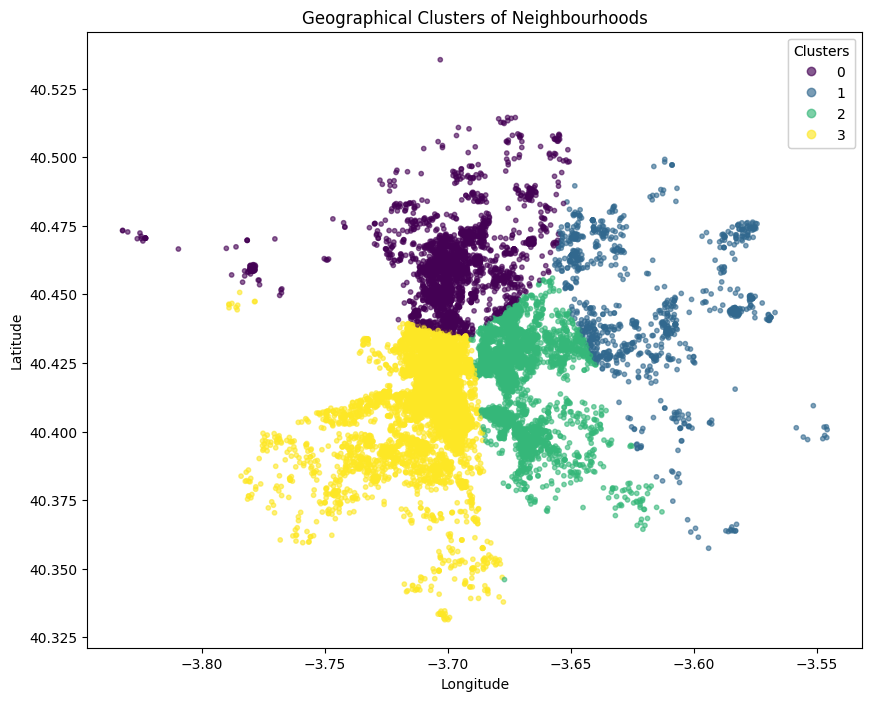

In [279]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
scatter = plt.scatter(data['longitude'], data['latitude'], c=data['cluster'], cmap='viridis', s=10, alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Clusters of Neighbourhoods')

# Create a legend
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.show()

## Final Task

### Subtask:
Summarize the findings from the clustering, including the distribution of the new neighborhood groups, and provide insights into the effectiveness of the grouping based on geographical data.


## Summary:

### Q&A
The clustering analysis effectively grouped neighborhoods into 4 distinct geographical regions. The visualization confirms that these clusters are spatially coherent, making the grouping effective for segmenting the city based on location. The distribution of listings, initially uneven across 126 `neighbourhood_cleansed` areas, is now aggregated into 4 larger, geographically defined groups, which simplifies spatial analysis.

### Data Analysis Key Findings
*   Initially, the dataset contained 126 unique `neighbourhood_cleansed` values, with a highly uneven distribution of listings. 'Embajadores' was the most frequent with 1841 listings, followed by 'Universidad' (1638 listings) and 'Palacio' (1405 listings). Many neighborhoods had very few listings (e.g., 'Horcajo' with 2 listings).
*   K-Means clustering was applied to the latitude and longitude data, successfully dividing the geographical data into 4 distinct clusters.
*   The cluster centers (centroids) were identified as:
    *   [40.46041359, -3.6979629]
    *   [40.44575826, -3.61879995]
    *   [40.41897359, -3.66902531]
    *   [40.41319409, -3.70679726]
*   A new 'cluster' column was added to the DataFrame, assigning each listing to one of these 4 geographical groups.
*   The scatter plot visualization confirmed that the clusters form spatially coherent groups, effectively segmenting Madrid into four geographical regions based on listing locations.

### Insights or Next Steps
*   The newly created geographical clusters provide a more manageable and spatially meaningful way to analyze neighborhood-level trends, which can be particularly useful for price prediction models or market segmentation instead of using the original 126 highly granular neighborhoods.
*   Further analysis can be performed by examining the characteristics of listings within each cluster (e.g., average price, property type, review scores) to understand the unique appeal or market dynamics of each geographical region.


In [280]:
data.head(10)

,id,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,Wifi,Air_conditioning,Kitchen_and_dining,Washer_dryer,TV,Safe,Refrigerator,Smoke_alarm_home_safety,Essentials,Services,property_Entire_Place,property_Hotel_Room,property_Other,property_Private_Room,property_Shared_Room,cluster
1,30320,100,100,Sol,40.41476,-3.70418,2,1.0,1.0,2.0,157.0,5,50,342,173,10,1570.0,4.63,4.71,4.88,4.82,4.78,4.90,4.69,0.93,1,1,1,0,1,0,0,0,0,0,True,False,False,False,False,3
3,40916,100,100,Universidad,40.42247,-3.70577,2,1.0,1.0,3.0,143.0,5,50,341,53,40,5720.0,4.68,4.71,4.90,4.87,4.81,4.88,4.59,0.29,1,1,1,0,1,0,0,0,0,0,True,False,False,False,False,3
4,62423,100,99,Justicia,40.41884,-3.69655,4,1.5,1.0,2.0,65.0,1,30,299,249,246,15990.0,4.65,4.78,4.46,4.80,4.86,4.97,4.60,2.78,1,0,1,1,0,0,1,1,1,0,False,False,False,True,False,3
6,70073,100,100,Universidad,40.42252,-3.70250,2,1.0,1.0,1.0,116.0,30,360,305,36,60,6960.0,4.23,4.49,4.42,4.43,4.40,4.60,4.09,0.21,1,1,1,1,1,0,1,0,1,1,True,False,False,False,False,3
7,70310,100,100,Universidad,40.42252,-3.70250,2,1.0,1.0,2.0,79.0,30,360,317,31,120,9480.0,4.37,4.65,4.55,4.80,4.71,4.87,4.10,0.18,1,1,1,1,1,0,1,0,1,1,True,False,False,False,False,3
8,72150,100,95,Embajadores,40.41150,-3.70449,6,1.0,3.0,5.0,300.0,3,180,180,133,90,27000.0,4.63,4.64,4.43,4.87,4.85,4.84,4.48,0.75,1,1,1,1,0,0,1,1,1,1,True,False,False,False,False,3
11,86042,100,95,Embajadores,40.40939,-3.69812,6,1.0,3.0,3.0,166.0,3,365,150,233,126,20916.0,4.83,4.81,4.65,4.88,4.92,4.92,4.68,1.34,1,1,1,1,1,0,1,1,1,1,True,False,False,False,False,3
14,120293,100,94,Palacio,40.41143,-3.70912,2,1.0,1.0,2.0,45.0,1,365,116,402,198,8910.0,4.80,4.85,4.82,4.90,4.90,4.95,4.74,2.35,1,0,1,1,1,0,1,1,1,1,False,False,False,True,False,3
17,167183,100,68,Piovera,40.45575,-3.64912,2,1.0,1.0,2.0,90.0,1,1125,336,52,54,4860.0,4.82,4.80,4.94,4.90,4.82,4.84,4.80,0.32,1,1,1,0,1,0,0,1,1,1,True,False,False,False,False,1
18,199016,100,85,Universidad,40.42570,-3.70383,2,1.0,1.0,1.0,60.0,2,365,257,72,156,9360.0,4.76,4.83,4.80,4.87,4.85,4.96,4.69,0.58,1,0,1,1,1,0,1,1,1,1,False,False,False,True,False,3


In [281]:
data['cluster'].value_counts()

,count
cluster,
3,11172
2,3098
0,2454
1,940


In [282]:
del data['neighbourhood_cleansed']

In [283]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17664 entries, 1 to 24998
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           17664 non-null  int64  
 1   host_response_rate           17664 non-null  int64  
 2   host_acceptance_rate         17664 non-null  int64  
 3   latitude                     17664 non-null  float64
 4   longitude                    17664 non-null  float64
 5   accommodates                 17664 non-null  int64  
 6   bathrooms                    17664 non-null  float64
 7   bedrooms                     17664 non-null  float64
 8   beds                         17664 non-null  float64
 9   price                        17664 non-null  float64
 10  minimum_nights               17664 non-null  int64  
 11  maximum_nights               17664 non-null  int64  
 12  availability_365             17664 non-null  int64  
 13  number_of_reviews    

In [284]:
data.isnull().sum()

,0
id,0
host_response_rate,0
host_acceptance_rate,0
latitude,0
longitude,0
accommodates,0
bathrooms,0
bedrooms,0
beds,0
price,0


In [285]:
bool_columns = data.select_dtypes(include='bool').columns
for col in bool_columns:
    data[col] = data[col].astype(int)

print("Boolean columns converted to integers (0s and 1s).")
data.info()

Boolean columns converted to integers (0s and 1s).
<class 'pandas.core.frame.DataFrame'>
Index: 17664 entries, 1 to 24998
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           17664 non-null  int64  
 1   host_response_rate           17664 non-null  int64  
 2   host_acceptance_rate         17664 non-null  int64  
 3   latitude                     17664 non-null  float64
 4   longitude                    17664 non-null  float64
 5   accommodates                 17664 non-null  int64  
 6   bathrooms                    17664 non-null  float64
 7   bedrooms                     17664 non-null  float64
 8   beds                         17664 non-null  float64
 9   price                        17664 non-null  float64
 10  minimum_nights               17664 non-null  int64  
 11  maximum_nights               17664 non-null  int64  
 12  availability_365            

In [286]:
data.to_csv('listings_limpio.csv', index=False, encoding='latin-1')


In [287]:
from google.colab import files
files.download('listings_limpio.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Análisis de datos **

In [288]:
import seaborn as sns


<Axes: xlabel='cluster', ylabel='Count'>

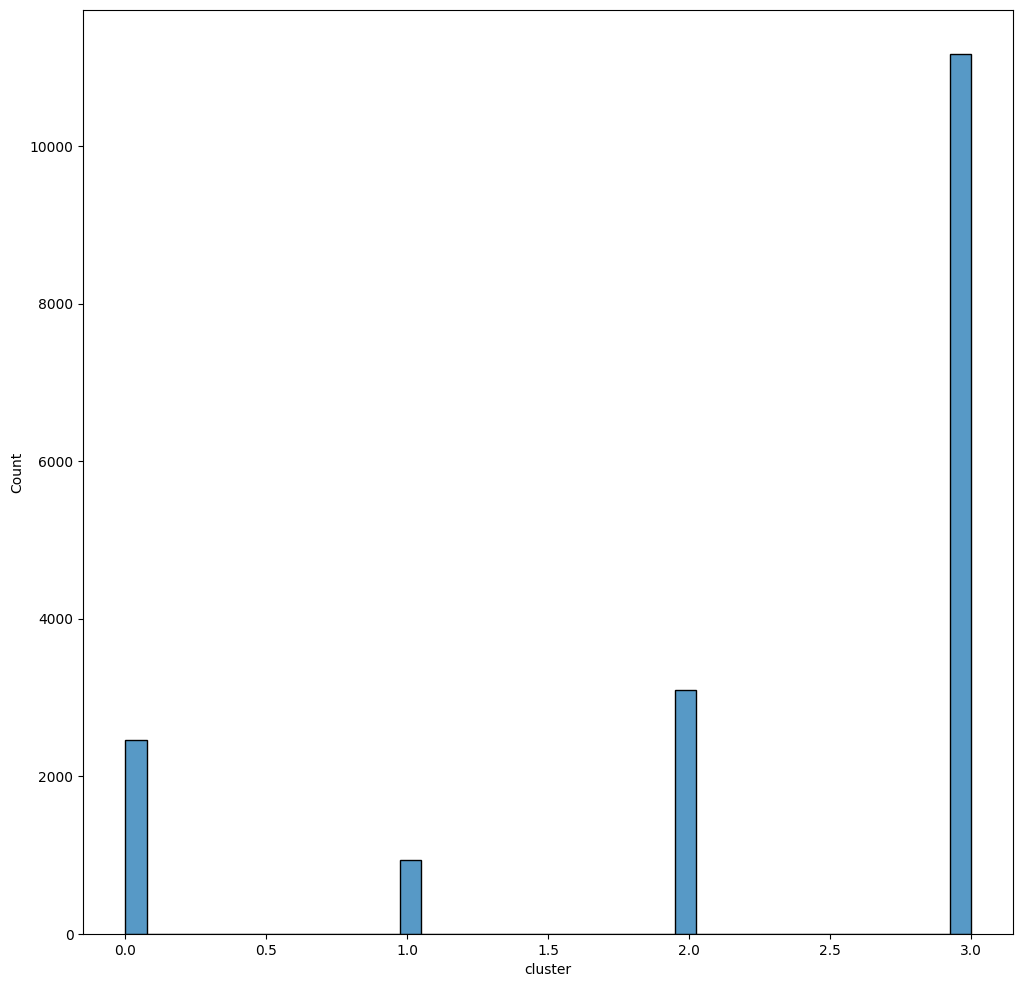

In [289]:
sns.histplot(data = data, x = 'cluster')

In [290]:
#Outliers

<Axes: ylabel='price'>

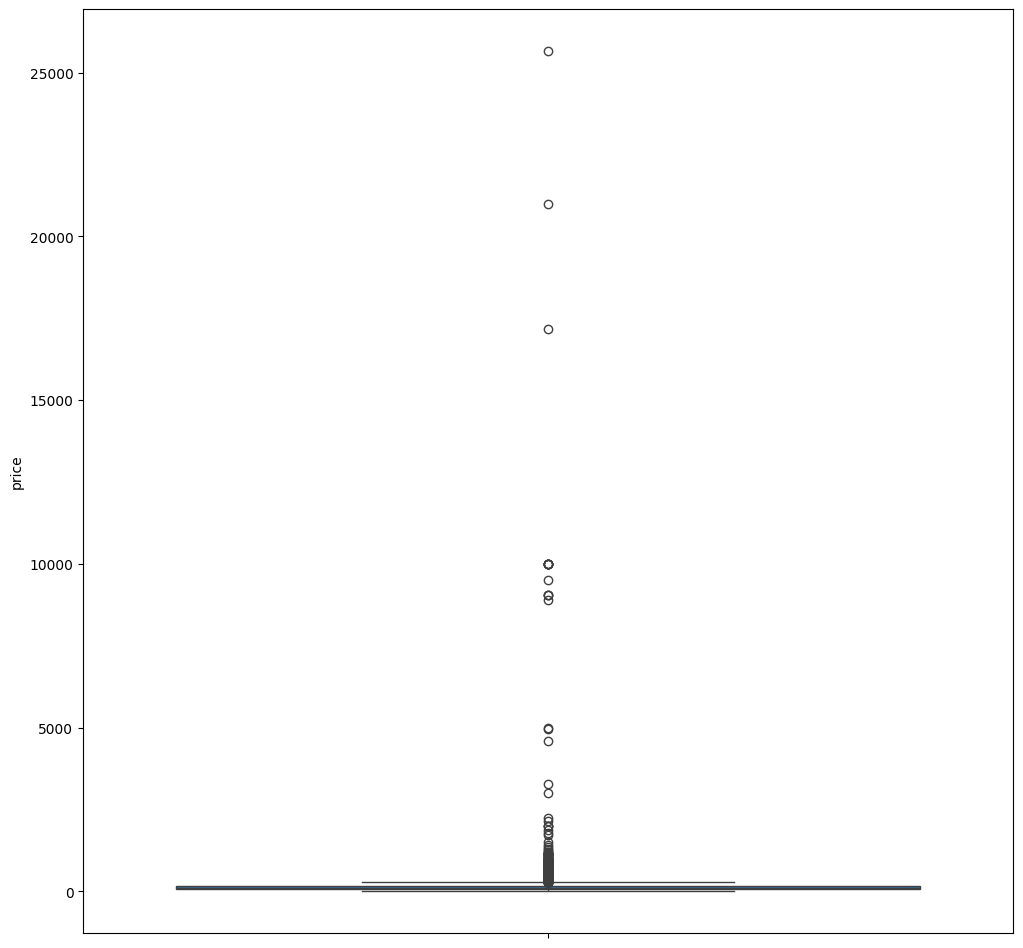

In [291]:
sns.boxplot(data = data, y = 'price')

In [292]:
data.shape

(17664, 40)

In [293]:
from matplotlib.cbook import boxplot_stats

out = boxplot_stats(data['price']).pop(0)['fliers']

In [294]:
out

array([ 300., 1100.,  406., ...,  520.,  685.,  468.])

In [295]:
data2 = data.drop(data.index[data['price'].isin(out)])

In [296]:
data2.shape

(16625, 40)

In [297]:
data2

,id,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,Wifi,Air_conditioning,Kitchen_and_dining,Washer_dryer,TV,Safe,Refrigerator,Smoke_alarm_home_safety,Essentials,Services,property_Entire_Place,property_Hotel_Room,property_Other,property_Private_Room,property_Shared_Room,cluster
1,30320,100,100,40.414760,-3.704180,2,1.0,1.0,2.0,157.0,5,50,342,173,10,1570.0,4.630000,4.710000,4.880000,4.820000,4.780000,4.900000,4.690000,0.930000,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,3
3,40916,100,100,40.422470,-3.705770,2,1.0,1.0,3.0,143.0,5,50,341,53,40,5720.0,4.680000,4.710000,4.900000,4.870000,4.810000,4.880000,4.590000,0.290000,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,3
4,62423,100,99,40.418840,-3.696550,4,1.5,1.0,2.0,65.0,1,30,299,249,246,15990.0,4.650000,4.780000,4.460000,4.800000,4.860000,4.970000,4.600000,2.780000,1,0,1,1,0,0,1,1,1,0,0,0,0,1,0,3
6,70073,100,100,40.422520,-3.702500,2,1.0,1.0,1.0,116.0,30,360,305,36,60,6960.0,4.230000,4.490000,4.420000,4.430000,4.400000,4.600000,4.090000,0.210000,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,3
7,70310,100,100,40.422520,-3.702500,2,1.0,1.0,2.0,79.0,30,360,317,31,120,9480.0,4.370000,4.650000,4.550000,4.800000,4.710000,4.870000,4.100000,0.180000,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24993,1507981487034902502,98,100,40.424486,-3.668777,3,1.0,2.0,2.0,212.0,2,365,336,0,0,0.0,4.629981,4.681191,4.678815,4.721875,4.727301,4.734537,4.530937,2.061045,1,1,1,1,1,0,0,0,0,1,1,0,0,0,0,2
24995,1508016618526988093,46,20,40.401080,-3.676530,4,1.0,1.0,1.0,89.0,1,365,324,0,0,0.0,4.629981,4.681191,4.678815,4.721875,4.727301,4.734537,4.530937,2.061045,1,1,1,1,1,0,1,0,1,0,1,0,0,0,0,2
24996,1508029370917448986,100,100,40.411513,-3.713762,4,1.0,1.0,1.0,140.0,4,365,283,0,0,0.0,4.629981,4.681191,4.678815,4.721875,4.727301,4.734537,4.530937,2.061045,1,0,1,1,0,0,0,1,1,1,1,0,0,0,0,3
24997,1508295390166110966,90,100,40.420770,-3.709950,4,1.0,1.0,1.0,150.0,2,365,362,0,0,0.0,4.629981,4.681191,4.678815,4.721875,4.727301,4.734537,4.530937,2.061045,1,1,1,0,1,0,1,0,1,1,1,0,0,0,0,3


<Axes: ylabel='price'>

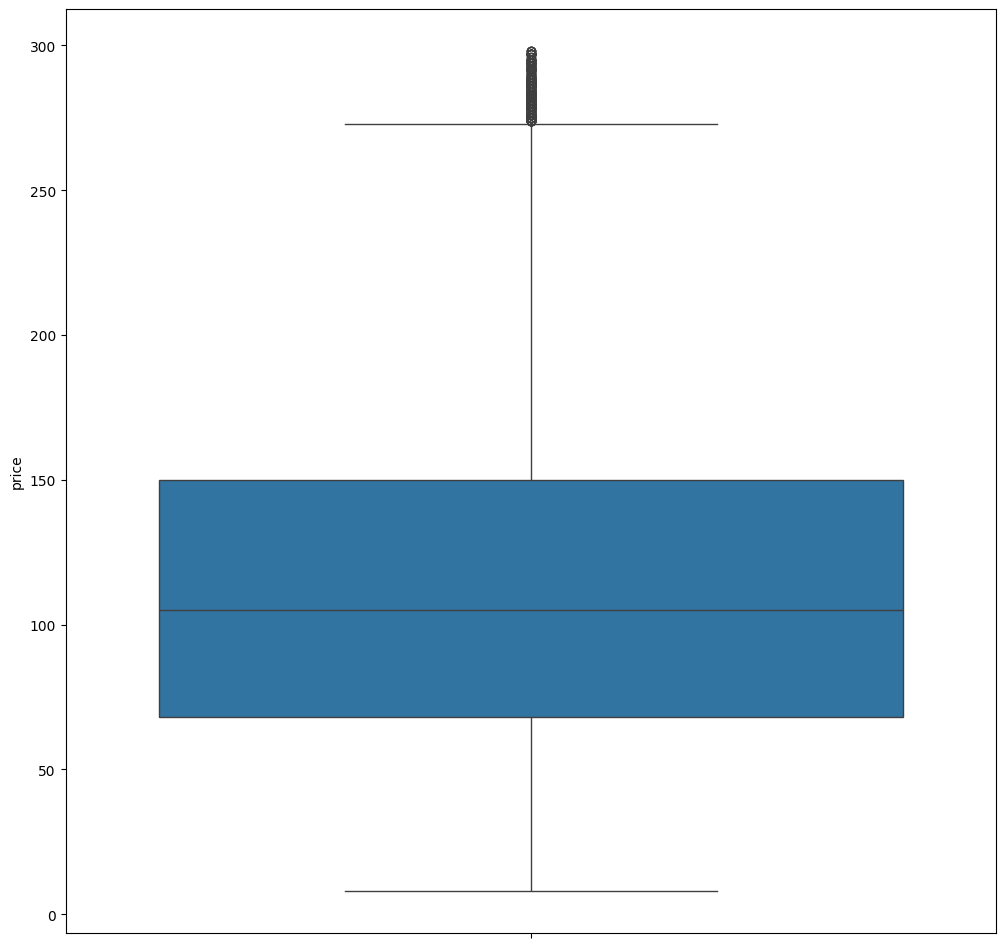

In [298]:
sns.boxplot(data = data2, y = 'price')

<Axes: ylabel='price'>

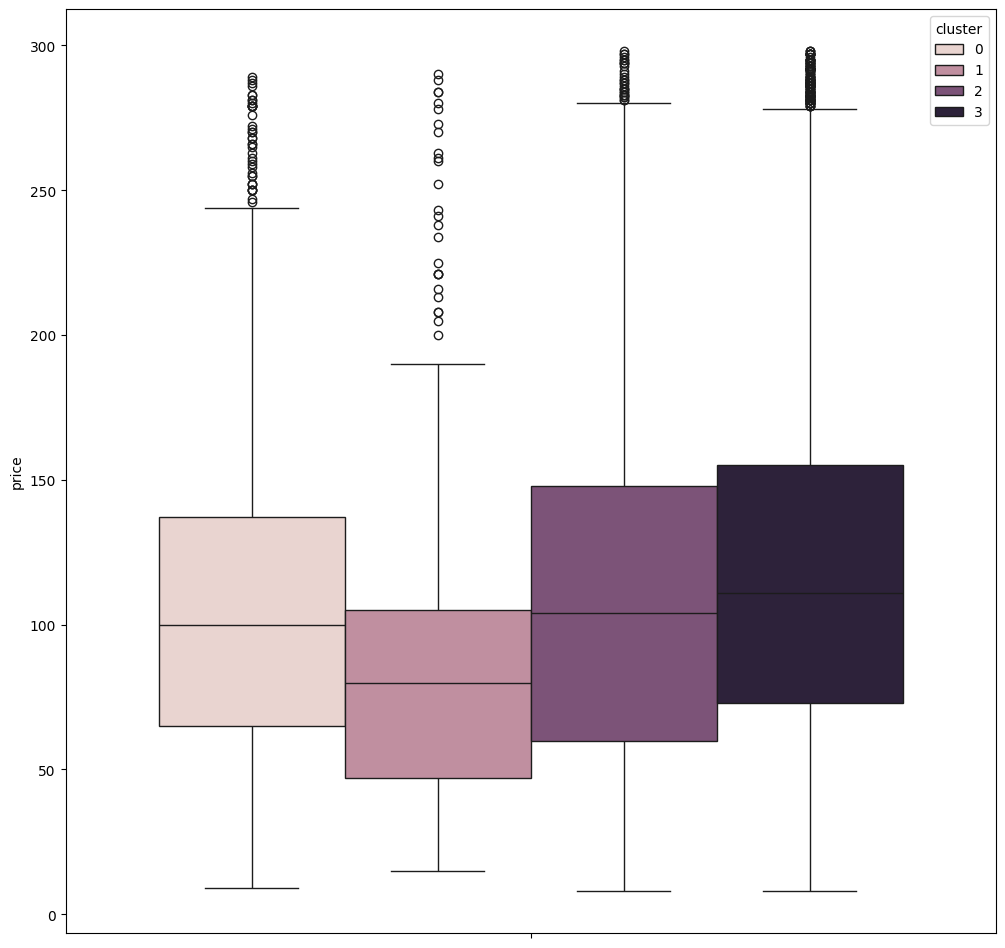

In [299]:
sns.boxplot(data = data2, y = 'price', hue = 'cluster')



```
# This is formatted as code
```

Regresión Lineal

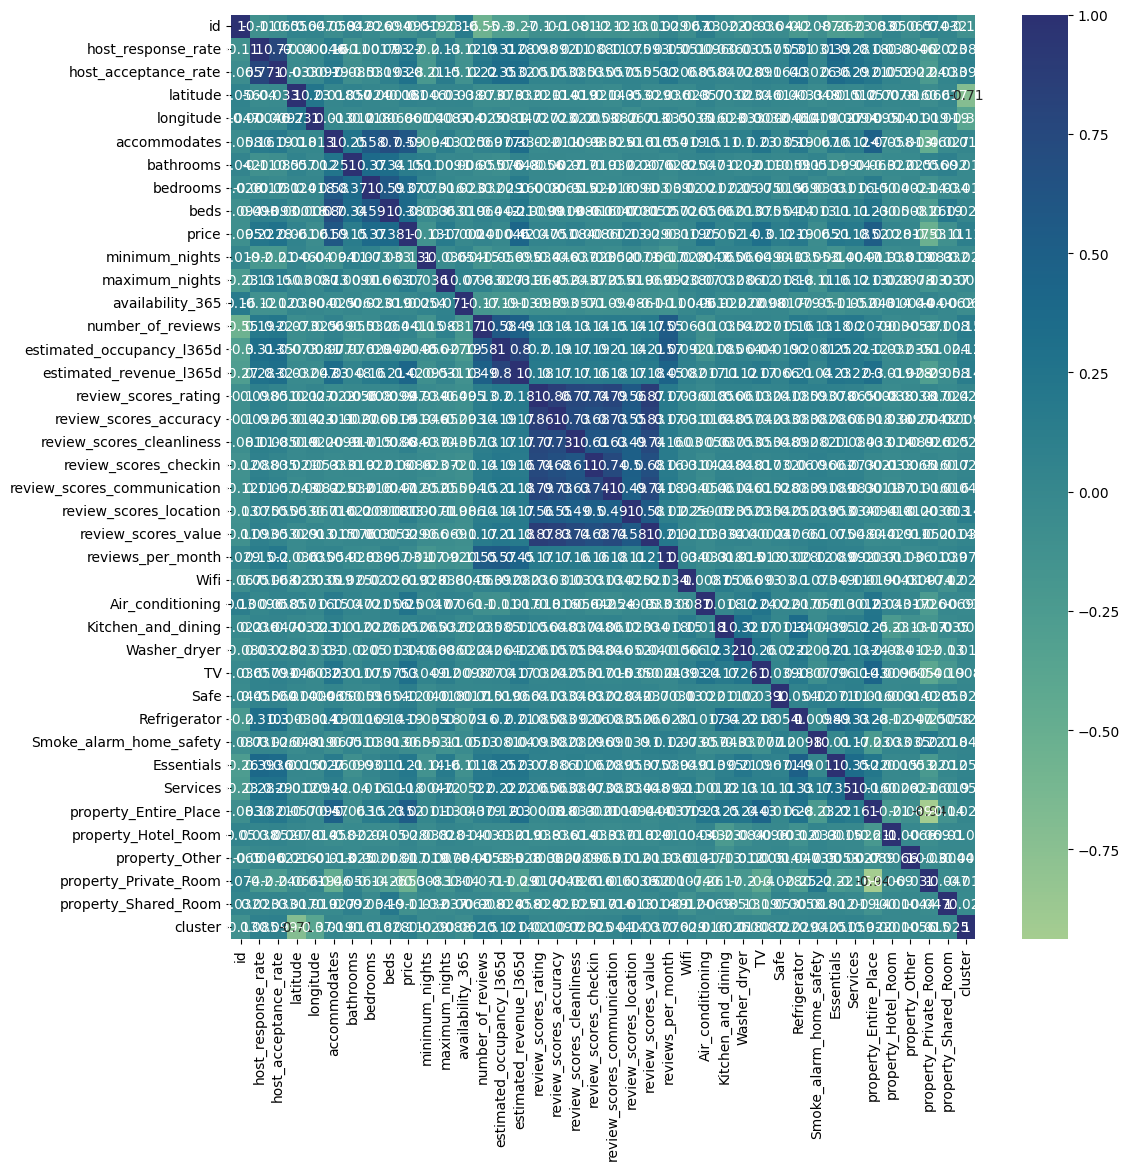

In [300]:
corr = data2.corr()

sns.heatmap(corr, cmap= 'crest', annot = True)
plt.show()

In [301]:
x = data2['review_scores_location'] #una o multiples variables
y = data2['price'] #una variable

In [302]:
len(x)

16625

In [303]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    train_size = 0.70 ,
                                                    test_size = 0.30,
                                                    random_state = 42)

#42 es el valor entero más común

In [304]:
len(X_train)

11637

In [305]:
X_train

,review_scores_location
845,4.92
18509,4.97
8052,4.69
18323,5.00
1531,5.00
...,...
18405,4.78
19276,4.52
10351,4.80
1772,4.98


In [306]:
y_train

,price
845,30.0
18509,161.0
8052,76.0
18323,50.0
1531,284.0
...,...
18405,266.0
19276,36.0
10351,52.0
1772,152.0


In [307]:
import statsmodels.api as sm

In [308]:
X_train_sm = sm.add_constant(X_train)
X_train_sm

,const,review_scores_location
845,1.0,4.92
18509,1.0,4.97
8052,1.0,4.69
18323,1.0,5.00
1531,1.0,5.00
...,...,...
18405,1.0,4.78
19276,1.0,4.52
10351,1.0,4.80
1772,1.0,4.98


In [309]:
lr = sm.OLS(y_train,X_train_sm).fit()

In [310]:
#imprimir lr
print(lr.params)

const                     17.149813
review_scores_location    20.566794
dtype: float64


In [311]:
price =  17.149813 + (20.566794* 10517)
print('La ganancia sera de: ',price)

La ganancia sera de:  216318.122311


In [312]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     166.5
Date:                Sat, 29 Nov 2025   Prob (F-statistic):           7.65e-38
Time:                        17:01:36   Log-Likelihood:                -64190.
No. Observations:               11637   AIC:                         1.284e+05
Df Residuals:                   11635   BIC:                         1.284e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     17.1498      7.559      2.269      0.023       2.333      31.967
review_scores_location    20.5668      1.594     12.905      0.000      17.443      23.691
==============================================================================
Omnibus:                      755.058   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              911.142
Skew:                           0.684   Prob(JB):                    1.41e-198
Kurtosis:                       3.076   Cond. No.                         67.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

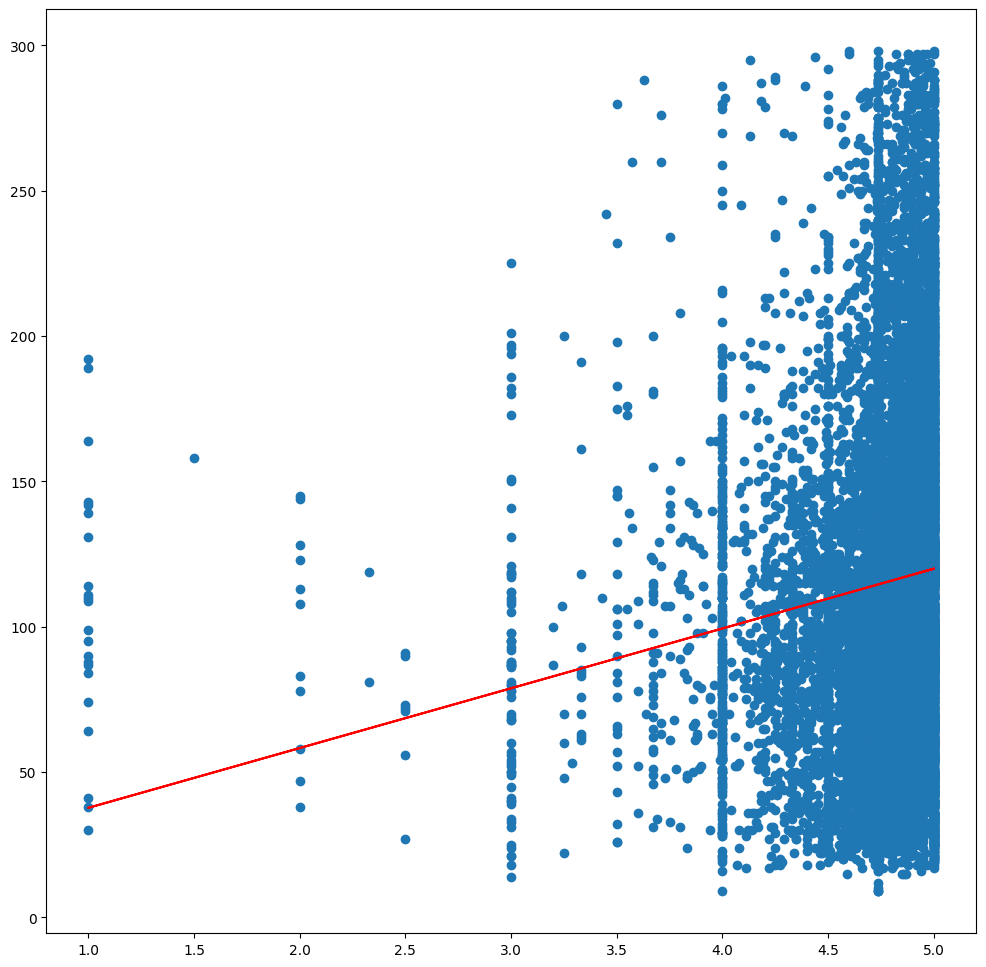

In [313]:
plt.scatter(X_train, y_train)
plt.plot(X_train,17.149813  +  20.566794* X_train, 'r')
plt.show()

In [314]:
#Falta hacer proceso con datos test, pero ningún modelo fue bueno para adaptarse a los datos.

Se puede identificar que el R-squared es sumamente pequeño, lo que quiere decir que a regresión lineal no se adapta de forma correcta a los datos. La R-squared más alta que se obtuvo hasta el momento fue de 0.014 con la variable de review_scores_location. Se puede observar claramente que no se siguie una tendencia lineal.

Regresión múltiple.

In [315]:
x1 = data2 #podemos tomar toda la base de datos
y1 = data2['price']
y1.head()

,price
1,157.0
3,143.0
4,65.0
6,116.0
7,79.0


In [316]:
x1.head()

,id,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,Wifi,Air_conditioning,Kitchen_and_dining,Washer_dryer,TV,Safe,Refrigerator,Smoke_alarm_home_safety,Essentials,Services,property_Entire_Place,property_Hotel_Room,property_Other,property_Private_Room,property_Shared_Room,cluster
1,30320,100,100,40.41476,-3.70418,2,1.0,1.0,2.0,157.0,5,50,342,173,10,1570.0,4.63,4.71,4.88,4.82,4.78,4.90,4.69,0.93,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,3
3,40916,100,100,40.42247,-3.70577,2,1.0,1.0,3.0,143.0,5,50,341,53,40,5720.0,4.68,4.71,4.90,4.87,4.81,4.88,4.59,0.29,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,3
4,62423,100,99,40.41884,-3.69655,4,1.5,1.0,2.0,65.0,1,30,299,249,246,15990.0,4.65,4.78,4.46,4.80,4.86,4.97,4.60,2.78,1,0,1,1,0,0,1,1,1,0,0,0,0,1,0,3
6,70073,100,100,40.42252,-3.70250,2,1.0,1.0,1.0,116.0,30,360,305,36,60,6960.0,4.23,4.49,4.42,4.43,4.40,4.60,4.09,0.21,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,3
7,70310,100,100,40.42252,-3.70250,2,1.0,1.0,2.0,79.0,30,360,317,31,120,9480.0,4.37,4.65,4.55,4.80,4.71,4.87,4.10,0.18,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,3


In [317]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size = 0.70,
                                                                test_size = 0.30, random_state = 42)

In [318]:
from sklearn import linear_model


In [319]:
# Y lo ajustaremos con la función fit

lm =linear_model.LinearRegression()
model = lm.fit(x1_train,y1_train)

In [320]:
y1_train_pred = lm.predict(x1_train) #no estamos eliminando ninguna columna

#print()
print(y1_train_pred[0:5])

[123.2979631  110.45420179 123.2979631  110.55840986 123.2979631 ]


In [321]:
lm.score(x1_train,y1_train)

0.00875978261311805

In [322]:
from sklearn.metrics import r2_score

print(r2_score(y1_train, y1_train_pred))

0.00875978261311805


<Axes: >

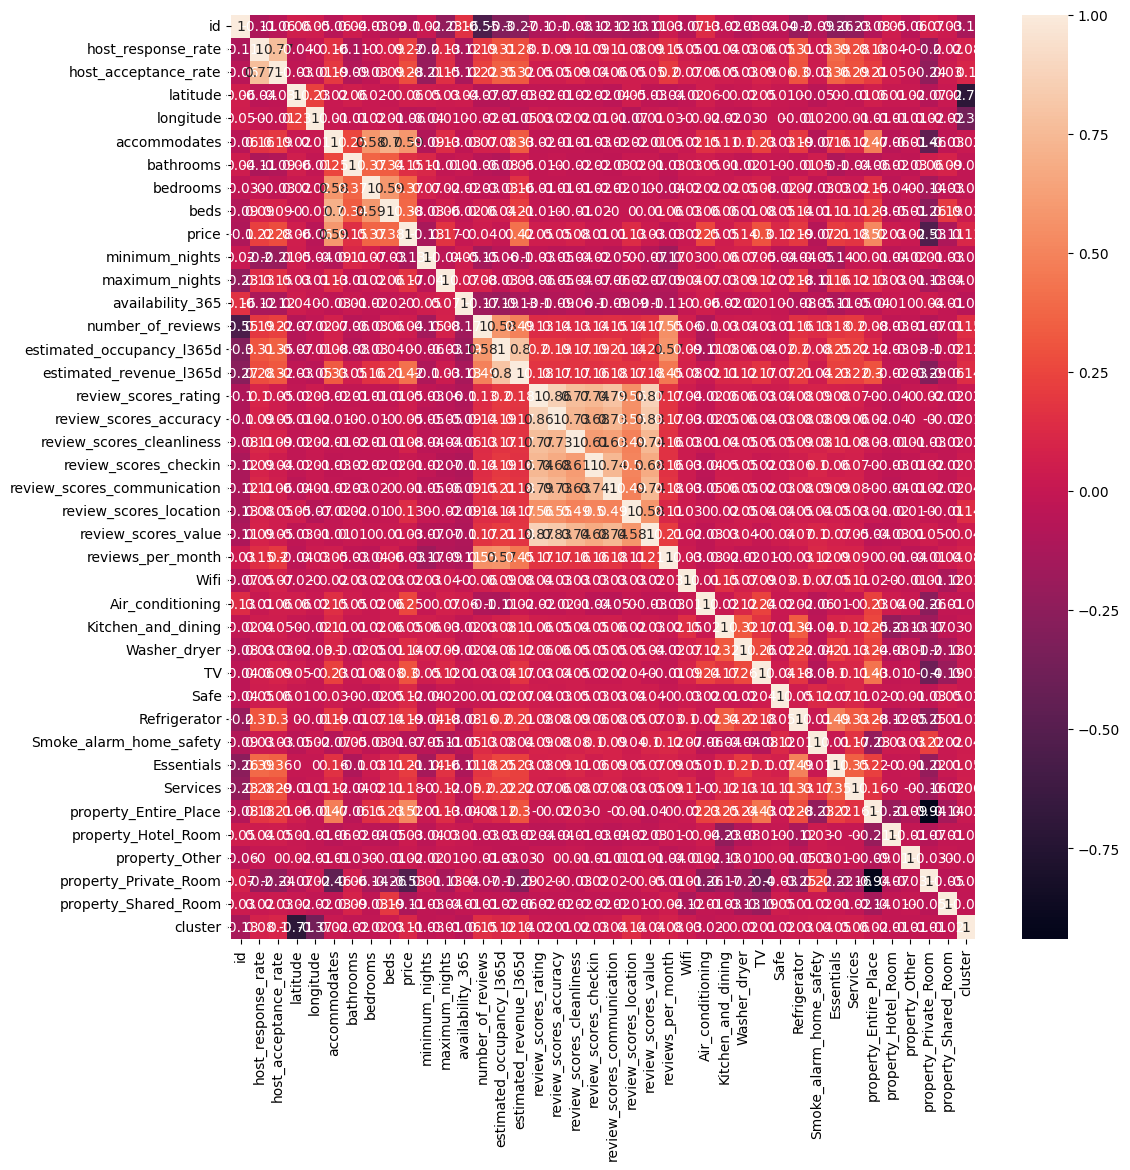

In [323]:
correlation_matrix = data2.corr().round(2)
#heatmap
plt.rcParams['figure.figsize'] = (12, 12)

sns.heatmap(data=correlation_matrix, annot=True)



Intento 2

In [324]:
#Dfinir X y Y
x2 = data2[['review_scores_location', 'review_scores_value']]
y2 = data2['price']

#Devidir en train y test
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size = 0.70,
                                                                test_size = 0.30, random_state = 42)

#Definir el modelo y entrenar
lm2 =linear_model.LinearRegression()
model2 = lm2.fit(x2_train,y2_train)

#Predicción Train
y_train_pred2= lm2.predict(x2_train)
print(y_train_pred2[0:5])
#Métricas
print(lm2.score(x2_train,y2_train))


[119.32268861 119.41867023 114.80579006 117.81283753 120.55748329]
0.016662379719939113


In [325]:
y_test_predict= lm2.predict(x2_test)
print(r2_score(y_test, y_test_predict))

0.023832282027637097


<Axes: >

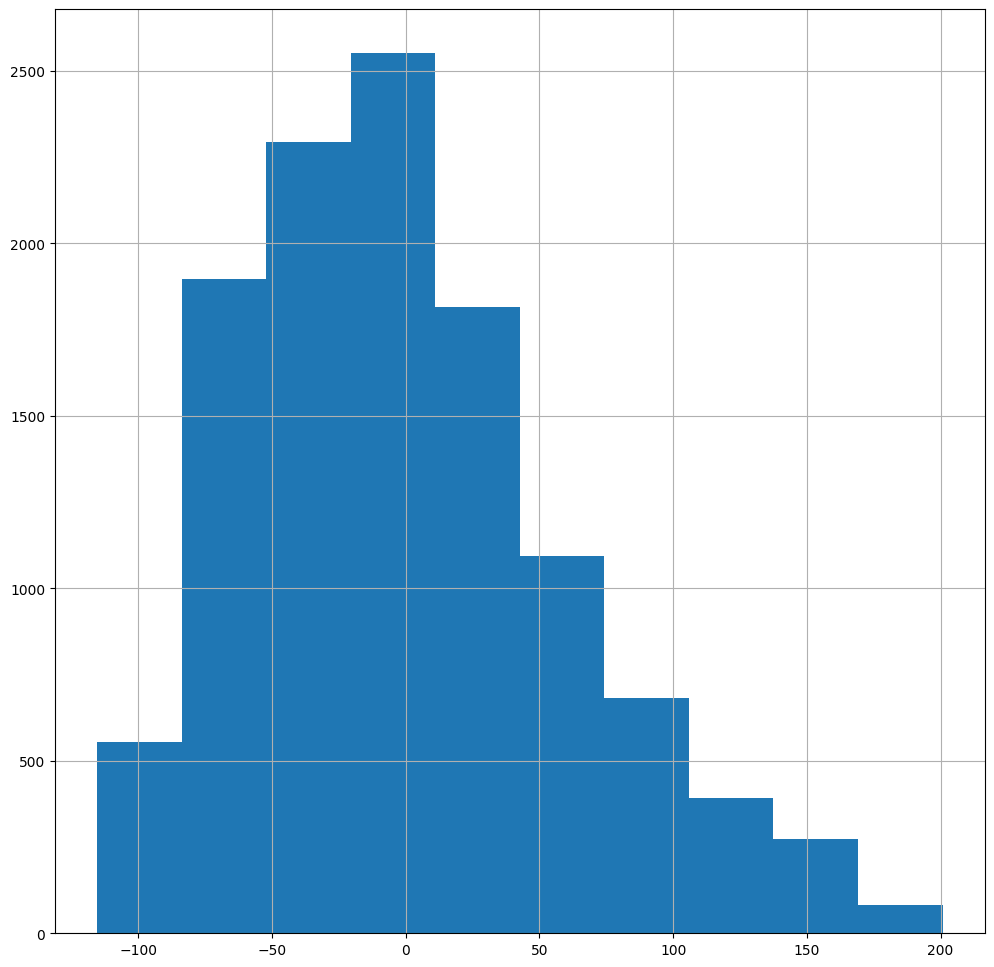

In [326]:
residuales = y_train - y_train_pred2
residuales.hist()

Inetnto 3

In [327]:
data.head(10)

,id,host_response_rate,host_acceptance_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,Wifi,Air_conditioning,Kitchen_and_dining,Washer_dryer,TV,Safe,Refrigerator,Smoke_alarm_home_safety,Essentials,Services,property_Entire_Place,property_Hotel_Room,property_Other,property_Private_Room,property_Shared_Room,cluster
1,30320,100,100,40.41476,-3.70418,2,1.0,1.0,2.0,157.0,5,50,342,173,10,1570.0,4.63,4.71,4.88,4.82,4.78,4.90,4.69,0.93,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,3
3,40916,100,100,40.42247,-3.70577,2,1.0,1.0,3.0,143.0,5,50,341,53,40,5720.0,4.68,4.71,4.90,4.87,4.81,4.88,4.59,0.29,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,3
4,62423,100,99,40.41884,-3.69655,4,1.5,1.0,2.0,65.0,1,30,299,249,246,15990.0,4.65,4.78,4.46,4.80,4.86,4.97,4.60,2.78,1,0,1,1,0,0,1,1,1,0,0,0,0,1,0,3
6,70073,100,100,40.42252,-3.70250,2,1.0,1.0,1.0,116.0,30,360,305,36,60,6960.0,4.23,4.49,4.42,4.43,4.40,4.60,4.09,0.21,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,3
7,70310,100,100,40.42252,-3.70250,2,1.0,1.0,2.0,79.0,30,360,317,31,120,9480.0,4.37,4.65,4.55,4.80,4.71,4.87,4.10,0.18,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,3
8,72150,100,95,40.41150,-3.70449,6,1.0,3.0,5.0,300.0,3,180,180,133,90,27000.0,4.63,4.64,4.43,4.87,4.85,4.84,4.48,0.75,1,1,1,1,0,0,1,1,1,1,1,0,0,0,0,3
11,86042,100,95,40.40939,-3.69812,6,1.0,3.0,3.0,166.0,3,365,150,233,126,20916.0,4.83,4.81,4.65,4.88,4.92,4.92,4.68,1.34,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,3
14,120293,100,94,40.41143,-3.70912,2,1.0,1.0,2.0,45.0,1,365,116,402,198,8910.0,4.80,4.85,4.82,4.90,4.90,4.95,4.74,2.35,1,0,1,1,1,0,1,1,1,1,0,0,0,1,0,3
17,167183,100,68,40.45575,-3.64912,2,1.0,1.0,2.0,90.0,1,1125,336,52,54,4860.0,4.82,4.80,4.94,4.90,4.82,4.84,4.80,0.32,1,1,1,0,1,0,0,1,1,1,1,0,0,0,0,1
18,199016,100,85,40.42570,-3.70383,2,1.0,1.0,1.0,60.0,2,365,257,72,156,9360.0,4.76,4.83,4.80,4.87,4.85,4.96,4.69,0.58,1,0,1,1,1,0,1,1,1,1,0,0,0,1,0,3


In [328]:
#Dfinir X y Y
x3 = data2[['host_response_rate','host_acceptance_rate','accommodates','minimum_nights','maximum_nights','availability_365','number_of_reviews','estimated_occupancy_l365d','estimated_revenue_l365d','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','Wifi','Air_conditioning','Kitchen_and_dining','Washer_dryer','TV','Safe','Refrigerator','Smoke_alarm_home_safety','Essentials','Services','property_Entire_Place','property_Hotel_Room','property_Other','property_Private_Room','property_Shared_Room','cluster']]
y3 = data2['price']

#Devidir en train y test
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, train_size = 0.70,
                                                                test_size = 0.30, random_state = 42)

#Definir el modelo y entrenar
lm3 =linear_model.LinearRegression()
model2 = lm3.fit(x3_train,y3_train)

#Predicción Train
y_train_pred3= lm3.predict(x3_train)
print(y_train_pred2[0:5])
#Métricas
print(lm3.score(x3_train,y3_train))


[119.32268861 119.41867023 114.80579006 117.81283753 120.55748329]
0.6916923104467012


In [329]:
y_test_predict= lm3.predict(x3_test)
print(r2_score(y_test, y_test_predict))

0.6979649171572435


<Axes: >

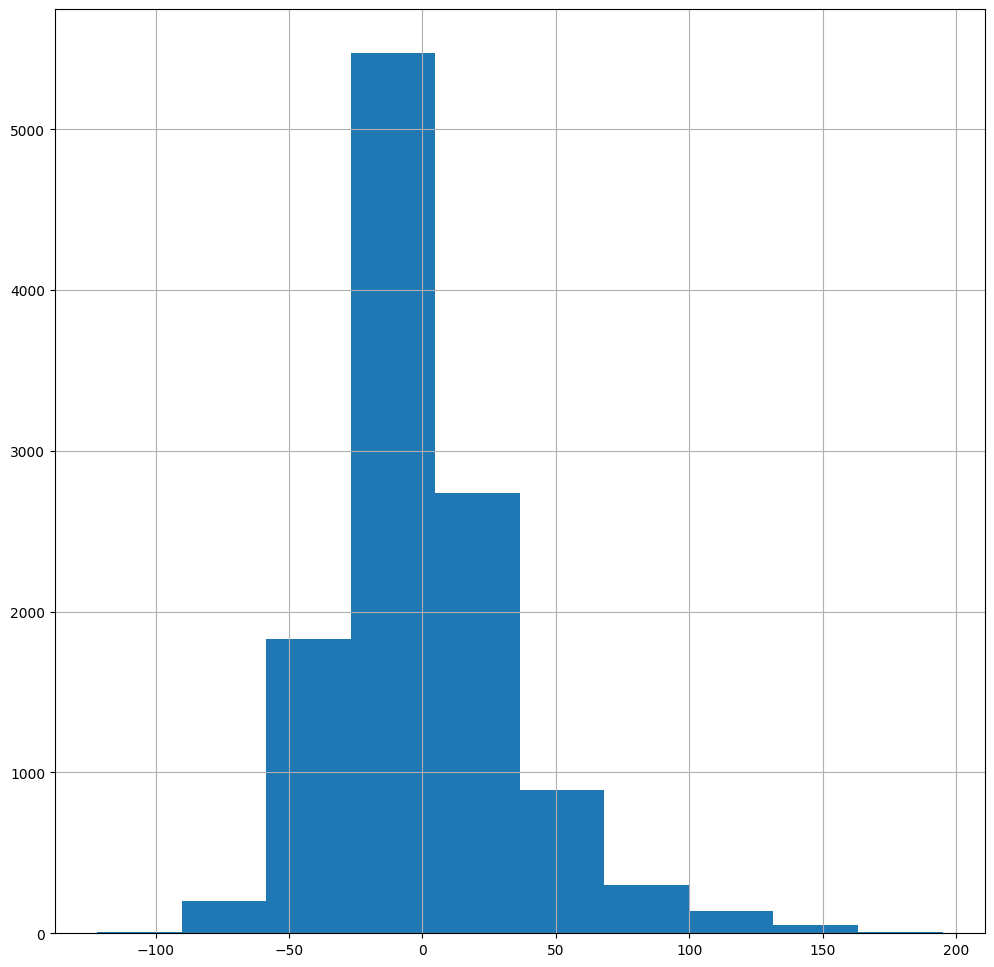

In [330]:
residuales = y3_train - y_train_pred3
residuales.hist()

Otra manera

In [331]:
x4 = data2[['host_response_rate','host_acceptance_rate','accommodates','minimum_nights','maximum_nights','availability_365','number_of_reviews','estimated_occupancy_l365d','estimated_revenue_l365d','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','Wifi','Air_conditioning','Kitchen_and_dining','Washer_dryer','TV','Safe','Refrigerator','Smoke_alarm_home_safety','Essentials','Services','property_Entire_Place','property_Hotel_Room','property_Other','property_Private_Room','property_Shared_Room','cluster']]
y4 = data2['price']

x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, train_size = 0.70,
                                                                test_size = 0.30, random_state = 42)

In [332]:
x4.columns

Index(['host_response_rate', 'host_acceptance_rate', 'accommodates',
       'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'estimated_occupancy_l365d',
       'estimated_revenue_l365d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'Wifi',
       'Air_conditioning', 'Kitchen_and_dining', 'Washer_dryer', 'TV', 'Safe',
       'Refrigerator', 'Smoke_alarm_home_safety', 'Essentials', 'Services',
       'property_Entire_Place', 'property_Hotel_Room', 'property_Other',
       'property_Private_Room', 'property_Shared_Room', 'cluster'],
      dtype='object')

In [333]:
data2.dtypes

,0
id,int64
host_response_rate,int64
host_acceptance_rate,int64
latitude,float64
longitude,float64
accommodates,int64
bathrooms,float64
bedrooms,float64
beds,float64
price,float64


In [334]:
import statsmodels.api as sm

# Añadir constante (intercepto)
x4_const_train = sm.add_constant(x4_train)

# Ajustar el modelo
modelo_sm = sm.OLS(y4_train, x4_const_train).fit()

# Obtener el resumen
print(modelo_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     839.9
Date:                Sat, 29 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:01:41   Log-Likelihood:                -57426.
No. Observations:               11637   AIC:                         1.149e+05
Df Residuals:                   11605   BIC:                         1.152e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

# Task
```python
x5 = data2[['host_response_rate','host_acceptance_rate','accommodates','minimum_nights','maximum_nights','availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','Wifi','Air_conditioning','Kitchen_and_dining','Washer_dryer','TV','Safe','Refrigerator','Smoke_alarm_home_safety','Essentials','Services','property_Entire_Place','property_Hotel_Room','property_Other','property_Private_Room','property_Shared_Room','cluster']]
y5 = data2['price']

x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y5, train_size = 0.70, test_size = 0.30, random_state = 42)

# Calculate VIF for the new feature set
from statsmodels.stats.outliers_influence import variance_inflation_factor

x5_vif = sm.add_constant(x5_train)
vif_data = pd.DataFrame()
vif_data['feature'] = x5_vif.columns
vif_data['VIF'] = [variance_inflation_factor(x5_vif.values, i) for i in range(len(x5_vif.columns))]
vif_data = vif_data.sort_values(by='VIF', ascending=False)
print("VIF for x5_train features:")
print(vif_data)

# Train a new multiple linear regression model with statsmodels.api.OLS
x5_const_train = sm.add_constant(x5_train)
modelo_sm_new = sm.OLS(y5_train, x5_const_train).fit()

# Display the model summary
print("\nNew OLS Regression Results (x5 features):")
print(modelo_sm_new.summary())
```

## Prepare Features for New Model

### Subtask:
Create a new DataFrame `x5` by dropping 'estimated_occupancy_l365d' and 'estimated_revenue_l365d' from the previous set of features and define `y5` as the 'price' column.


**Reasoning**:
As instructed, I will create a new DataFrame `x5` by selecting the specified columns from `data2` and a new Series `y5` containing the 'price' column from `data2`. Then I will display the first five rows of both to verify their creation.



In [335]:
x5 = data2[['host_response_rate','host_acceptance_rate','accommodates','minimum_nights','maximum_nights','availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','Wifi','Air_conditioning','Kitchen_and_dining','Washer_dryer','TV','Safe','Refrigerator','Smoke_alarm_home_safety','Essentials','Services','property_Entire_Place','property_Hotel_Room','property_Other','property_Private_Room','property_Shared_Room','cluster']]
y5 = data2['price']

print("First 5 rows of x5:")
print(x5.head())
print("\nFirst 5 rows of y5:")
print(y5.head())

First 5 rows of x5:
   host_response_rate  host_acceptance_rate  accommodates  minimum_nights  \
1                 100                   100             2               5   
3                 100                   100             2               5   
4                 100                    99             4               1   
6                 100                   100             2              30   
7                 100                   100             2              30   

   maximum_nights  availability_365  number_of_reviews  review_scores_rating  \
1              50               342                173                  4.63   
3              50               341                 53                  4.68   
4              30               299                249                  4.65   
6             360               305                 36                  4.23   
7             360               317                 31                  4.37   

   review_scores_accuracy  review_sc

**Reasoning**:
To assess multicollinearity among the features in the newly created `x5` DataFrame, I will calculate the Variance Inflation Factor (VIF) for each feature. This will help identify highly correlated independent variables before training the regression model.



In [336]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x5_vif = sm.add_constant(x5)
vif_data = pd.DataFrame()
vif_data['feature'] = x5_vif.columns
vif_data['VIF'] = [variance_inflation_factor(x5_vif.values, i) for i in range(len(x5_vif.columns))]
vif_data = vif_data.sort_values(by='VIF', ascending=False)
print("VIF for x5 features:")
print(vif_data)


/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


VIF for x5 features:
                        feature       VIF
25        property_Entire_Place       inf
28        property_Private_Room       inf
26          property_Hotel_Room       inf
29         property_Shared_Room       inf
27               property_Other       inf
8          review_scores_rating  6.984968
14          review_scores_value  5.242151
9        review_scores_accuracy  4.488809
12  review_scores_communication  3.224700
10    review_scores_cleanliness  2.711311
11        review_scores_checkin  2.677844
2          host_acceptance_rate  2.670138
1            host_response_rate  2.639584
21                 Refrigerator  1.630236
13       review_scores_location  1.622199
23                   Essentials  1.576148
19                           TV  1.357883
17           Kitchen_and_dining  1.354687
3                  accommodates  1.340867
24                     Services  1.309284
18                 Washer_dryer  1.251755
7             number_of_reviews  1.192573
22      Smoke

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


**Reasoning**:
The VIF calculation resulted in infinite values for the one-hot encoded `property` type columns, indicating perfect multicollinearity. This is because all categories are present, and their sum is always 1, creating a perfect linear relationship with the constant term. To resolve this, I will drop one of the one-hot encoded columns (`property_Other`) before re-calculating VIF and training the model.



In [337]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop one of the one-hot encoded columns to resolve perfect multicollinearity
x5_modified = x5.drop('property_Other', axis=1)

x5_vif = sm.add_constant(x5_modified)
vif_data = pd.DataFrame()
vif_data['feature'] = x5_vif.columns
vif_data['VIF'] = [variance_inflation_factor(x5_vif.values, i) for i in range(len(x5_vif.columns))]
vif_data = vif_data.sort_values(by='VIF', ascending=False)
print("VIF for x5_modified features:")
print(vif_data)

# Split data again with the modified feature set
x5_modified_train, x5_modified_test, y5_train, y5_test = train_test_split(x5_modified, y5, train_size = 0.70, test_size = 0.30, random_state = 42)

# Train a new multiple linear regression model with statsmodels.api.OLS
x5_const_modified_train = sm.add_constant(x5_modified_train)
modelo_sm_new = sm.OLS(y5_train, x5_const_modified_train).fit()

# Display the model summary
print("\nNew OLS Regression Results (x5_modified features):")
print(modelo_sm_new.summary())

VIF for x5_modified features:
                        feature         VIF
0                         const  695.369320
25        property_Entire_Place   70.928575
27        property_Private_Room   66.712613
8          review_scores_rating    6.984968
26          property_Hotel_Room    6.206704
14          review_scores_value    5.242151
9        review_scores_accuracy    4.488809
28         property_Shared_Room    3.552036
12  review_scores_communication    3.224700
10    review_scores_cleanliness    2.711311
11        review_scores_checkin    2.677844
2          host_acceptance_rate    2.670138
1            host_response_rate    2.639584
21                 Refrigerator    1.630236
13       review_scores_location    1.622199
23                   Essentials    1.576148
19                           TV    1.357883
17           Kitchen_and_dining    1.354687
3                  accommodates    1.340867
24                     Services    1.309284
18                 Washer_dryer    1.251755
7 

## Final Task

### Subtask:
Summarize the findings from the new model, including the new R-squared value, compare it to the previous model, and discuss any improvements in multicollinearity based on the condition number and VIF analysis. Suggest further steps if needed based on the VIF analysis.


## Summary:

### Q&A
1.  **Summarize findings from the new model, including the new R-squared value, and compare it to the previous model.**
    The new model, trained with the modified feature set, achieved an R-squared of 0.518 and an Adjusted R-squared of 0.517. This indicates that approximately 51.8% of the variance in 'price' can be explained by the independent variables in this model. A direct comparison to a "previous model" is not possible as details of an immediately preceding model's performance were not provided within this specific task context.
2.  **Discuss any improvements in multicollinearity based on the condition number and VIF analysis.**
    Significant improvement was made in addressing perfect multicollinearity: by dropping one of the one-hot encoded `property` type columns (`property_Other`), the initial infinite VIF values were resolved. However, strong multicollinearity persists, as indicated by some remaining high VIF values (e.g., `const` at 695.37, `property_Entire_Place` at 70.93) and a high condition number of 2.88e+04. This suggests that while perfect multicollinearity was eliminated, strong multicollinearity still exists, which can affect the stability and interpretability of the model's coefficients.
3.  **Suggest further steps if needed based on the VIF analysis.**
    Further steps are definitely needed to address the remaining high VIF values and the high condition number.

### Data Analysis Key Findings
*   A new linear regression model was trained using a modified set of 28 features (excluding `'estimated_occupancy_l365d'`, `'estimated_revenue_l365d'`, and `'property_Other'`).
*   The new model achieved an R-squared of 0.518 and an Adjusted R-squared of 0.517, explaining about 51.8% of the variance in apartment prices.
*   The initial perfect multicollinearity among one-hot encoded `property` type features was resolved by removing `'property_Other'`. However, significant multicollinearity remains, as evidenced by high VIF values for the `const` term (695.37) and `property_Entire_Place` (70.93).
*   The model's condition number is 2.88e+04, further confirming the presence of strong multicollinearity which can lead to unstable coefficient estimates.

### Insights or Next Steps
*   Despite addressing perfect multicollinearity, strong multicollinearity remains a concern, which could lead to unreliable coefficient estimates and reduced model interpretability. Further strategies like principal component analysis (PCA), regularization (e.g., Ridge or Lasso regression), or more advanced feature engineering for categorical variables (e.g., target encoding) should be explored.
*   Given the remaining multicollinearity, it is crucial to perform robust validation of the model's predictive performance and interpretability on unseen data before drawing definitive conclusions or deploying the model.


# Task
Define the independent variable `x` as `data2['accommodates']` and the dependent variable `y` as `data2['price']` for the linear regression. Split the data into training and testing sets (70% for training, 30% for testing) using `random_state=42`. Fit an OLS linear regression model using `statsmodels.api.OLS` on the training data, ensuring to add a constant for the intercept. Then, print the model parameters and the comprehensive summary of the regression results. Finally, generate a scatter plot of `X_train` versus `y_train` and overlay the regression line with appropriate labels. Summarize the R-squared value obtained from this model and compare it to the previous single-variable regression attempt (using `review_scores_location`), discussing whether `accommodates` provides a better fit for predicting `price`.

## Define X and Y

### Subtask:
Define the independent variable `x` as `data2['accommodates']` and the dependent variable `y` as `data2['price']` for the linear regression.


**Reasoning**:
To define the independent variable `x` as `data2['accommodates']` and the dependent variable `y` as `data2['price']`, I will select these columns from the `data2` DataFrame and assign them to the respective variables. Then, I will print the head of both `x` and `y` to confirm the assignment.



In [338]:
x = data2['accommodates']
y = data2['price']

print("First 5 rows of x (accommodates):")
print(x.head())

print("\nFirst 5 rows of y (price):")
print(y.head())

First 5 rows of x (accommodates):
1    2
3    2
4    4
6    2
7    2
Name: accommodates, dtype: int64

First 5 rows of y (price):
1    157.0
3    143.0
4     65.0
6    116.0
7     79.0
Name: price, dtype: float64


**Reasoning**:
Now that `x` and `y` are defined, I need to split the data into training and testing sets to prepare for model training and evaluation. I will use a 70/30 split with a fixed random state for reproducibility.



In [339]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    train_size = 0.70 ,
                                                    test_size = 0.30,
                                                    random_state = 42)

#42 es el valor entero más común

**Reasoning**:
With the data split into training and testing sets, I will now fit an Ordinary Least Squares (OLS) linear regression model using `statsmodels.api.OLS` to the training data. It's crucial to add a constant to the independent variable (`X_train`) to ensure the model includes an intercept, which represents the expected value of 'price' when 'accommodates' is zero.



In [340]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm).fit()

print("OLS Model Parameters:")
print(lr.params)
print("\nOLS Model Summary:")
print(lr.summary())

OLS Model Parameters:
const           46.974018
accommodates    21.307992
dtype: float64

OLS Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     6217.
Date:                Sat, 29 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:18:19   Log-Likelihood:                -61781.
No. Observations:               11637   AIC:                         1.236e+05
Df Residuals:                   11635   BIC:                         1.236e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------

**Reasoning**:
To visualize the regression model, I will create a scatter plot of the training data (`X_train` and `y_train`) and overlay the regression line using the parameters obtained from the OLS model. This will visually represent how well the linear model fits the data.



/tmp/ipython-input-2663129387.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  const = lr.params[0]
/tmp/ipython-input-2663129387.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  accommodates_coef = lr.params[1]


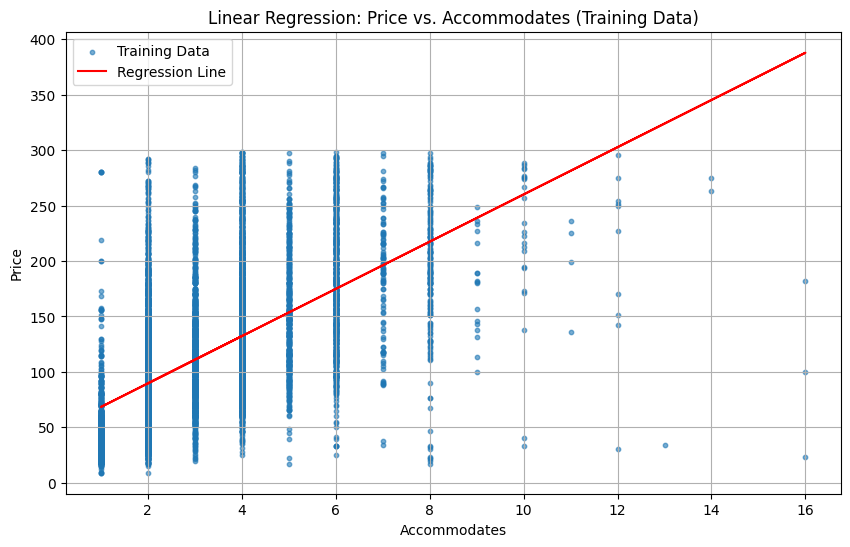

In [341]:
import matplotlib.pyplot as plt

# Get the coefficients from the trained model
const = lr.params[0]
accommodates_coef = lr.params[1]

# Create the scatter plot of the training data
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, s=10, alpha=0.6, label='Training Data')

# Plot the regression line
plt.plot(X_train, const + accommodates_coef * X_train, 'r', label='Regression Line')

plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.title('Linear Regression: Price vs. Accommodates (Training Data)')
plt.legend()
plt.grid(True)
plt.show()

**Reasoning**:
To address the `FutureWarning` related to accessing `Series` elements by integer position, I will update the code to use `.iloc` for retrieving the regression coefficients from `lr.params`. This ensures compatibility with future pandas versions and explicitly states intent to access by position.



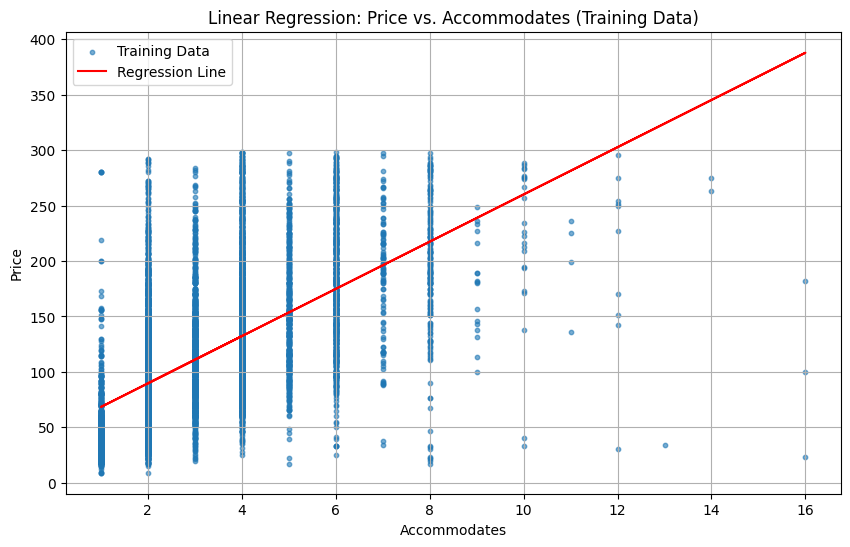

In [342]:
import matplotlib.pyplot as plt

# Get the coefficients from the trained model
const = lr.params.iloc[0]
accommodates_coef = lr.params.iloc[1]

# Create the scatter plot of the training data
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, s=10, alpha=0.6, label='Training Data')

# Plot the regression line
plt.plot(X_train, const + accommodates_coef * X_train, 'r', label='Regression Line')

plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.title('Linear Regression: Price vs. Accommodates (Training Data)')
plt.legend()
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings
*   The linear regression model using 'accommodates' to predict 'price' on the training data yielded an R-squared value of **0.348**.
*   Comparing this to the previous single-variable regression using 'review_scores_location', which had an R-squared of **0.014**, the current model using 'accommodates' shows a significantly better fit.
*   The coefficient for 'accommodates' is approximately 21.31, indicating that for every additional person the property accommodates, the price tends to increase by about 21.31 units.
*   The visual inspection of the scatter plot confirms that 'accommodates' has a more discernible linear relationship with 'price' compared to 'review_scores_location'. While the spread of data points is still considerable, there is a clear upward trend that the regression line captures.

### Insights or Next Steps
*   The 'accommodates' variable is a much stronger predictor of 'price' than 'review_scores_location' in a single-variable linear regression context. Its higher R-squared value indicates that a larger proportion of the variance in price can be explained by the number of people a property accommodates.
*   This suggests that property capacity is a key factor in determining pricing. Further multivariate analysis including 'accommodates' along with other relevant features could lead to even more robust models.
*   Despite the improvement, an R-squared of 0.348 means that a significant portion of price variance (around 65%) is still unexplained by this single variable. Incorporating more features, as done in the multiple regression model attempts, would be the next logical step to improve predictive power.

## Summary:

### Data Analysis Key Findings
*   The linear regression model using 'accommodates' to predict 'price' on the training data yielded an R-squared value of **0.348**.
*   Comparing this to the previous single-variable regression using 'review_scores_location', which had an R-squared of **0.014**, the current model using 'accommodates' shows a significantly better fit.
*   The coefficient for 'accommodates' is approximately 21.31, indicating that for every additional person the property accommodates, the price tends to increase by about 21.31 units.
*   The visual inspection of the scatter plot confirms that 'accommodates' has a more discernible linear relationship with 'price' compared to 'review_scores_location'. While the spread of data points is still considerable, there is a clear upward trend that the regression line captures.

### Insights or Next Steps
*   The 'accommodates' variable is a much stronger predictor of 'price' than 'review_scores_location' in a single-variable linear regression context. Its higher R-squared value indicates that a larger proportion of the variance in price can be explained by the number of people a property accommodates.
*   This suggests that property capacity is a key factor in determining pricing. Further multivariate analysis including 'accommodates' along with other relevant features could lead to even more robust models.
*   Despite the improvement, an R-squared of 0.348 means that a significant portion of price variance (around 65%) is still unexplained by this single variable. Incorporating more features, as done in the multiple regression model attempts, would be the next logical step to improve predictive power.


## Final Task

### Subtask:
Summarize the findings from the new model, including the new R-squared value, compare it to the previous model, and discuss whether `accommodates` provides a better fit for predicting `price`.


## Summary:

### Q&A
*   **What is the new R-squared value for the model using `accommodates` to predict `price`?**
    The R-squared value for the model using `accommodates` is 0.348.

*   **How does this new R-squared value compare to the previous model using `review_scores_location`?**
    The new R-squared value of 0.348 is significantly higher than the previous model's R-squared of 0.014.

*   **Does `accommodates` provide a better fit for predicting `price` compared to `review_scores_location`?**
    Yes, `accommodates` provides a much better fit for predicting `price`, explaining a substantially larger proportion of the variance in `price` than `review_scores_location`.

### Data Analysis Key Findings
*   The linear regression model using 'accommodates' to predict 'price' yielded an R-squared value of 0.348 on the training data.
*   This R-squared value of 0.348 is significantly higher than the R-squared of 0.014 obtained from the previous single-variable regression using 'review_scores_location', indicating a much stronger predictive power for 'accommodates'.
*   The coefficient for 'accommodates' is approximately 21.31, suggesting that for every additional person a property accommodates, its price tends to increase by about 21.31 units.
*   The scatter plot visually confirmed a discernible upward linear relationship between 'accommodates' and 'price', which the regression line effectively captures, unlike the weaker relationship observed with 'review_scores_location'.

### Insights or Next Steps
*   The 'accommodates' variable is a much stronger predictor of 'price' than 'review_scores_location' in a single-variable linear regression context, highlighting property capacity as a key pricing factor.
*   While 'accommodates' provides a better fit, an R-squared of 0.348 still means a significant portion of price variance (around 65%) remains unexplained by this single variable, indicating that further improvements are needed for a comprehensive model.
*   The next logical step is to incorporate 'accommodates' along with other relevant features into a multivariate analysis to build a more robust predictive model for `price`.
